# Mediterranean Sea EDA 

By: Martín Mendoza-Ceja  
Project Durtaion: 4/14/24 - 4/21/24            
Last Updated: 4/21/24

## Data Sources
#### Data Points
- [EMODnet Map Viewer](https://emodnet.ec.europa.eu/geoviewer/)
    - EMODnet Seabed Habitats/Composite data products/Coralligenous and other calcareous concretions in the Mediterranean(2023)
        - This dataset is said to "contain large data gaps and should viewed as incomplete." as stated in the metadata. With this in mind, I will continue an EDA in means to practice and gain experience when it comes to studying data.
    - EMODnet Chemistry/Contaminants/Concentration values/Heavy Metals - Lead and Mercury (Median Values)
#### The Mediterranean Sea body of water and countries that touch it
- [Mediterranean Sea](https://www.marineregions.org/gazetteer.php?p=details&id=1905)
- [Mediterranean Sea, land boundaries](https://www.diva-gis.org/gdata)
#### General Geography
- [World Administrative Boundaries - Countries and Territories](https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/export/?flg=en-us)
- [North Atlantic Ocean](https://www.marineregions.org/gazetteer.php?p=details&id=1912)
- [Red Sea](https://www.marineregions.org/gazetteer.php?p=details&id=4264)

In [1]:
import numpy as np #allows for efficient calculations and manipulation with arrays
import pandas as pd #allows for the use of data frames and application of data science
import matplotlib.pyplot as plt #used for object-oriented plotting or general plotting
import seaborn as sns #allows for visualizations
import regex as re #for manipulating strings
import geopandas as gpd #allows for geospatial analysis
sns.set_style('darkgrid')
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### Working Datasets

In [2]:
marine_habitats = gpd.read_file("CoralligenousPlatforms_2023/coralligenous_platforms_points_2023.shp") #marine habitats are located within the Mediterranean Sea
medi_lead = gpd.read_file("lead_concentration_median_values/lead_concentration_median_values.shp")
medi_mercury = gpd.read_file("merury_concentration_median_values/merury_concentration_median_values.shp")
medi_body = gpd.read_file("mediterranean_sea/iho.shp")



### General Datasets

In [3]:
world_bound = gpd.read_file("world-administrative-boundaries/world-administrative-boundaries.shp")
nao = gpd.read_file('NAO/iho.shp')
red_sea = gpd.read_file("Redsea/iho.shp")


The cell below contains the land boundaries for the countries that border the Mediterranean Sea.

In [4]:
albania = gpd.read_file("land_bounds/ALB_adm/ALB_adm0.shp")
algeria = gpd.read_file("land_bounds/DZA_adm/DZA_adm0.shp")
bosnia_and_herzegovina = gpd.read_file("land_bounds/BIH_adm/BIH_adm0.shp")
bosnia_and_herzegovina['NAME_0'] = 'Bosnia' #shorten for the ease of annotating 
croatia = gpd.read_file("land_bounds/HRV_adm/HRV_adm0.shp")
cyprus = gpd.read_file("land_bounds/CYP_adm/CYP_adm0.shp")
egypt = gpd.read_file("land_bounds/EGY_adm/EGY_adm0.shp")
france = gpd.read_file("land_bounds/FRA_adm/FRA_adm0.shp")
greece = gpd.read_file("land_bounds/GRC_adm/GRC_adm0.shp")
israel = gpd.read_file("land_bounds/ISR_adm/ISR_adm0.shp")
italy = gpd.read_file("land_bounds/ITA_adm/ITA_adm0.shp")
lebanon = gpd.read_file("land_bounds/LBN_adm/LBN_adm0.shp")
libya = gpd.read_file("land_bounds/LBY_adm/LBY_adm0.shp")
malta = gpd.read_file("land_bounds/MLT_adm/MLT_adm0.shp")
monaco = gpd.read_file("land_bounds/MCO_adm/MCO_adm0.shp")
montenegro = gpd.read_file("land_bounds/MNE_adm/MNE_adm0.shp")
morocco = gpd.read_file("land_bounds/MAR_adm/MAR_adm0.shp")
slovenia = gpd.read_file("land_bounds/SVN_adm/SVN_adm0.shp")
spain = gpd.read_file("land_bounds/ESP_adm/ESP_adm0.shp")
syria = gpd.read_file("land_bounds/SYR_adm/SYR_adm0.shp")
tunisia = gpd.read_file("land_bounds/TUN_adm/TUN_adm0.shp")
turkey = gpd.read_file("land_bounds/TUR_adm/TUR_adm0.shp")

#store them in a list for iteration
land_bounds = [
    albania, algeria, bosnia_and_herzegovina, croatia, cyprus, egypt,
    france, greece, israel, italy, lebanon, libya, malta,
    montenegro, morocco, slovenia, spain, syria, tunisia, turkey
]
#define land_bounds length
num_land_bounds = len(land_bounds)
#make dataframe out of them to access individual countries
land_bounds_df = pd.concat(land_bounds).set_index(['NAME_0'])


## Examine the Data

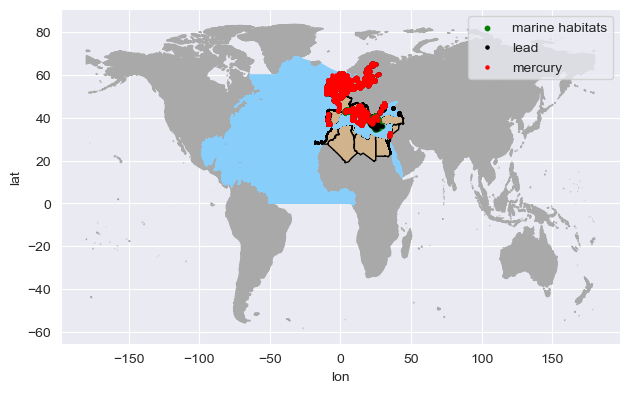

In [5]:
#looking at the current state of the map 
world,ax = plt.subplots()
world_bound.plot(ax=ax,color='darkgrey',edgecolor='darkgrey')
red_sea.plot(ax=ax,color='lightskyblue',edgecolor='lightskyblue')
nao.plot(ax=ax,color='lightskyblue',edgecolor='lightskyblue')
[land_bounds[i].plot(ax=ax,color='tan',edgecolor='k') for i in np.arange(num_land_bounds)] #plots each country that share the border wi

medi_body.plot(ax=ax,color='lightskyblue',edgecolor='lightskyblue')
marine_habitats.plot(ax=ax,color='g',label='marine habitats',markersize=10)
medi_lead.plot(ax=ax,color='k',label='lead',markersize=5)

medi_mercury.plot(ax=ax,color='r',label='mercury',markersize=5)
plt.xlabel('lon')
plt.ylabel('lat')
plt.legend()
plt.tight_layout()

#### Observation:
It seems that some data falls to Western Europe. For this project, I want be focusing on the Mediterranean Sea. I will geoprocess the data of the geoDataFrames to zoom in on the place of interest. 

### Inital DataFrames

In [6]:
marine_habitats.head()

,gid,fid_1,measuremen,eventid,datasetid,shorttitle,expectedci,restrictio,contactpoi,eventdate,mindepth,maxdepth,seabedclas,seabedcl_1,seabedtype,seabedty_1,seabedstat,samplingme,sampling_1,seabedty_2,seabedty_3,sourcehabi,relationsh,comments,eventendda,eov,eovsubtype,source,geometry
0,1,1.0,FR:AFB:CARTHAM:LOT09_394:MH003,FR:AFB:CARTHAM:LOT09_394,FR:AFB:CARTHAM:LOT09,CARTHAM FR9101493 and FR9102012 sites sample p...,"Programme CARTHAM, contrat AAMP  ASCONIT Cons...",Creative Commons CC-BY-NC,"[{""Role"" : ""Originator"", ""Organisation"" : ""SEA...",2011/05/05 00:00:00.000,29.0,29.0,EUNIS (version 2007-11),http://dd.eionet.europa.eu/vocabulary/biodiver...,A4.26D - Coralligenous platforms,http://dd.eionet.europa.eu/vocabularyconcept/b...,None,ROV,http://mmisw.org/ont/trdi/platforms/remotelyOp...,None,None,None,None,Coralligenous platforms,None,Not Applicable,Not Applicable,EMODnet Seabed Habitats survey sample points s...,MULTIPOINT (3.14697 42.51434)
1,2,2.0,FR:AFB:CARTHAM:LOT09_401:MH003,FR:AFB:CARTHAM:LOT09_401,FR:AFB:CARTHAM:LOT09,CARTHAM FR9101493 and FR9102012 sites sample p...,"Programme CARTHAM, contrat AAMP  ASCONIT Cons...",Creative Commons CC-BY-NC,"[{""Role"" : ""Originator"", ""Organisation"" : ""SEA...",2011/05/12 00:00:00.000,24.0,24.0,EUNIS (version 2007-11),http://dd.eionet.europa.eu/vocabulary/biodiver...,A4.26D - Coralligenous platforms,http://dd.eionet.europa.eu/vocabularyconcept/b...,None,ROV,http://mmisw.org/ont/trdi/platforms/remotelyOp...,None,None,None,None,Coralligenous platforms,None,Not Applicable,Not Applicable,EMODnet Seabed Habitats survey sample points s...,MULTIPOINT (3.16865 42.46627)
2,3,3.0,FR:AFB:CARTHAM:LOT09_409:MH003,FR:AFB:CARTHAM:LOT09_409,FR:AFB:CARTHAM:LOT09,CARTHAM FR9101493 and FR9102012 sites sample p...,"Programme CARTHAM, contrat AAMP  ASCONIT Cons...",Creative Commons CC-BY-NC,"[{""Role"" : ""Originator"", ""Organisation"" : ""SEA...",2011/05/05 00:00:00.000,37.0,37.0,EUNIS (version 2007-11),http://dd.eionet.europa.eu/vocabulary/biodiver...,A4.26D - Coralligenous platforms,http://dd.eionet.europa.eu/vocabularyconcept/b...,None,ROV,http://mmisw.org/ont/trdi/platforms/remotelyOp...,None,None,None,None,Coralligenous platforms,None,Not Applicable,Not Applicable,EMODnet Seabed Habitats survey sample points s...,MULTIPOINT (3.18117 42.44230)
3,4,4.0,FR:AFB:CARTHAM:LOT09_358:MH003,FR:AFB:CARTHAM:LOT09_358,FR:AFB:CARTHAM:LOT09,CARTHAM FR9101493 and FR9102012 sites sample p...,"Programme CARTHAM, contrat AAMP  ASCONIT Cons...",Creative Commons CC-BY-NC,"[{""Role"" : ""Originator"", ""Organisation"" : ""SEA...",2011/05/05 00:00:00.000,30.0,30.0,EUNIS (version 2007-11),http://dd.eionet.europa.eu/vocabulary/biodiver...,A4.26D - Coralligenous platforms,http://dd.eionet.europa.eu/vocabularyconcept/b...,None,ROV,http://mmisw.org/ont/trdi/platforms/remotelyOp...,None,None,None,None,Coralligenous platforms,None,Not Applicable,Not Applicable,EMODnet Seabed Habitats survey sample points s...,MULTIPOINT (3.17046 42.45876)
4,5,5.0,FR:AFB:CARTHAM:LOT09_364:MH003,FR:AFB:CARTHAM:LOT09_364,FR:AFB:CARTHAM:LOT09,CARTHAM FR9101493 and FR9102012 sites sample p...,"Programme CARTHAM, contrat AAMP  ASCONIT Cons...",Creative Commons CC-BY-NC,"[{""Role"" : ""Originator"", ""Organisation"" : ""SEA...",2011/05/05 00:00:00.000,47.0,47.0,EUNIS (version 2007-11),http://dd.eionet.europa.eu/vocabulary/biodiver...,A4.26D - Coralligenous platforms,http://dd.eionet.europa.eu/vocabularyconcept/b...,None,ROV,http://mmisw.org/ont/trdi/platforms/remotelyOp...,None,None,None,None,Coralligenous platforms,None,Not Applicable,Not Applicable,EMODnet Seabed Habitats survey sample points s...,MULTIPOINT (3.14721 42.51818)


In [7]:
medi_lead.head()

,Longitude,Latitude,Median Val,Matrix,geometry
0,-8.936,41.745,0.030,Water,POINT (-8.93600 41.74500)
1,-9.021,41.746,0.030,Water,POINT (-9.02100 41.74600)
2,-8.966,41.644,0.030,Water,POINT (-8.96600 41.64400)
3,-8.890,41.646,0.115,Water,POINT (-8.89000 41.64600)
4,-8.935,41.544,0.030,Water,POINT (-8.93500 41.54400)


In [8]:
medi_mercury.head()

,Longitude,Latitude,Median Val,Matrix,geometry
0,-8.936,41.745,0.0075,Water,POINT (-8.93600 41.74500)
1,-8.890,41.646,0.0075,Water,POINT (-8.89000 41.64600)
2,-8.853,41.545,0.0075,Water,POINT (-8.85300 41.54500)
3,-8.829,41.444,0.0075,Water,POINT (-8.82900 41.44400)
4,-8.804,41.365,0.0075,Water,POINT (-8.80400 41.36500)


In [9]:
medi_body.head()

,name,id,longitude,latitude,min_x,min_y,max_x,max_y,area,mrgid,geometry
0,Strait of Gibraltar,28a,-5.685219,35.979813,-6.032549,35.775977,-5.278705,36.186942,1664.0,3346,"POLYGON ((-5.34535 36.10906, -5.33202 36.06743..."
1,Alboran Sea,28b,-3.324097,35.912140,-5.353764,35.070668,-1.188263,36.841518,54711.0,3324,"POLYGON ((-2.19339 36.72103, -2.16383 36.68741..."
2,Ionian Sea,28f,18.629029,38.017851,15.084569,36.408966,23.224675,40.520659,171778.0,3351,"POLYGON ((17.09171 40.52056, 17.09275 40.52046..."
3,Tyrrhenian Sea,28e,12.141895,40.119835,8.648481,37.801461,16.223122,44.109457,217465.0,3386,"POLYGON ((9.45742 42.95050, 9.46952 42.98341, ..."
4,Adriatic Sea,28g,16.035586,42.729384,12.065226,39.743098,20.020828,45.808914,139454.0,3314,"POLYGON ((13.24486 45.76003, 13.24517 45.75947..."


## Cleaning/Prepping the Data

### GeoProcessing

#### Filter for the Mediterranean
Looking at the initial visual, I will filter for where longitude is greater than or equal to zero and latitude is less than or equal to 48. For `medi_lead` and `medi_mercury`. Reason being that within these latitdude and longitude values, it will project to the Mediterranean Sea

In [10]:
#makes copies
medi_lead_copy = medi_lead.copy()
medi_mercury_copy = medi_mercury.copy()
medi_body_copy = medi_body.copy()


In [11]:
#define desired coords
lon = 0
lat = 48

In [12]:
#manipulate the dataframes
medi_lead_filtered = medi_lead_copy.loc[(medi_lead_copy.Longitude >= lon ) & (medi_lead_copy.Latitude <= lat)]
medi_mercury_filtered = medi_mercury_copy.loc[(medi_mercury_copy.Longitude >= lon ) & (medi_mercury_copy.Latitude <= lat)]



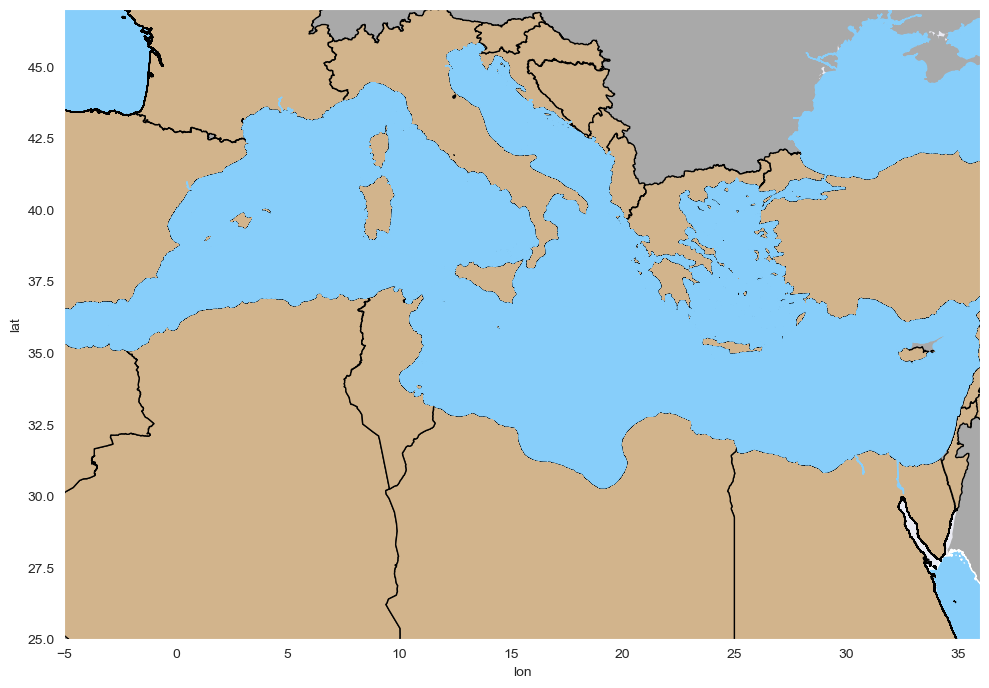

In [13]:
#looking for desired output
fig,ax = plt.subplots(figsize=(10,8))

world_bound.plot(ax=ax,color='darkgrey',edgecolor='darkgrey')
red_sea.plot(ax=ax,color='lightskyblue')
nao.plot(ax=ax,color='lightskyblue')

[land_bounds[i].plot(ax=ax,color='tan',edgecolor='k') for i in np.arange(num_land_bounds)] #plots each country that share the border with the Mediterranean


medi_body.plot(ax=ax,color='lightskyblue',edgecolor='lightskyblue')



plt.axis([-5,36,25,47]) #zooms in to the area of interest
plt.xlabel('lon')
plt.ylabel('lat')


plt.tight_layout()

#### Adding Labels

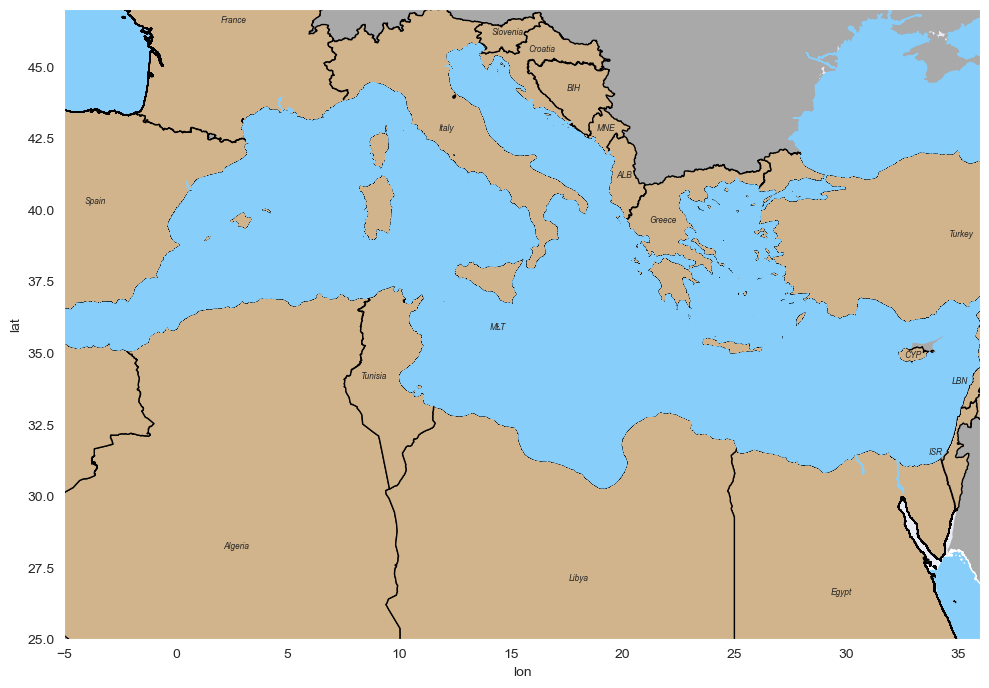

In [14]:
# This will take a while to load(30sec+)

mediterranean_sea,ax = plt.subplots(figsize=(10,8))

world_bound.plot(ax=ax,color='darkgrey',edgecolor='darkgrey')
red_sea.plot(ax=ax,color='lightskyblue')
nao.plot(ax=ax,color='lightskyblue')

[land_bounds[i].plot(ax=ax,color='tan',edgecolor='k') for i in np.arange(num_land_bounds)] #plots each country that share the border with the Mediterranean

#[land_bounds[i].geometry.centroid.plot(ax=ax,color='snow') 
# for i in np.arange(num_land_bounds)] #used this to visualize the centroid, which assisted in finding an adequate location for the label.

#code for adding labels for the countries
#the conditionals will place country's labels at or near their center(centroid) 

[plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=6,fontstyle='italic',annotation_clip=True)
 if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Slovenia'].NAME_ENGLI # fit the label for Slovenia
 else 
 plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=6,fontstyle='italic',annotation_clip=True)
 if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Croatia'].NAME_ENGLI # fit the label for Croatia
 else 
 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=6,fontstyle='italic',annotation_clip=True)
 if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Montenegro'].NAME_ENGLI # fit the label for Montenegro
 else 
 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=6,fontstyle='italic',annotation_clip=True)
 if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Albania'].NAME_ENGLI # fit the label for Albania
 else 
 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=6,fontstyle='italic',annotation_clip=True)
 if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Bosnia'].NAME_ENGLI # fit the label for Bosnia and Herzegovina
 else  
 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=6,fontstyle='italic',annotation_clip=True)
 if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Israel'].NAME_ENGLI  # fit the label for Israel 
 else 
 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.8,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=6,fontstyle='italic',annotation_clip=True)
 if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Lebanon'].NAME_ENGLI  # fit the label for Lebanon
 else 
 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y-0.1),
               ha='center',fontsize=6,fontstyle='italic',annotation_clip=True)
 if land_bounds[i].SQKM[0] <= 9226.847 # to fit the label for Cyprus and Malta
 else 
 plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.7,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=6,fontstyle='italic',annotation_clip=True)
 if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Tunisia'].NAME_ENGLI # fit the label for Tunisia
 else 
 plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1.2,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=6,fontstyle='italic',annotation_clip=True)
 if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Greece'].NAME_ENGLI # fit the label for Greece
 else plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
                   ha='center',fontsize=6,fontstyle='italic',annotation_clip=True) #to fit the label for bigger countries
 for i in np.arange(num_land_bounds)]


medi_body.plot(ax=ax,color='lightskyblue',edgecolor='lightskyblue')


 
plt.axis([-5,36,25,47]) #zooms in to the area of interest 
plt.xlabel('lon')
plt.ylabel('lat')


plt.tight_layout()

Having processed the map, I can now proceed with exploring data for the Mediterranean.

### Data Processing and Query Prep

#### Joining the Lead and Mercury Dataframes

In [15]:
# find a common column
pd.unique(medi_lead.Matrix),pd.unique(medi_mercury.Matrix)

(array(['Water', 'Biota', 'Sediment'], dtype=object),
 array(['Water', 'Biota', 'Sediment'], dtype=object))

In [16]:
medi_lead.rename({'Median Val':'median_val_lead'},inplace=True,axis=1)
medi_mercury.rename({'Median Val':'median_val_mercury'},inplace=True,axis=1)
medi_lead['median_val_mercury'] = medi_mercury.median_val_mercury
medi_lead_mercury = medi_lead

In [17]:
# put each habitat in its own dataframe
water_df = medi_lead_mercury.loc[medi_lead_mercury['Matrix'] == 'Water']
biota_df = medi_lead_mercury.loc[medi_lead_mercury['Matrix'] == 'Biota']
sediment_df = medi_lead_mercury.loc[medi_lead_mercury['Matrix'] == 'Sediment']
habi_dfs = [water_df,biota_df,sediment_df] #stored for iteration

#### Cleaning the `marine_habitats` Dataset

In [18]:
marine_habitats_copy = marine_habitats.copy()

In [19]:
# get relevent columns
marine_habitats = marine_habitats[['gid','shorttitle','eventdate','mindepth','maxdepth',
                            'seabedtype','samplingme','comments','geometry']]
# rename the columns
marine_habitats.rename(columns={'shorttitle':'title','samplingme':'sampling_method'},inplace=True)
marine_habitats.head()

,gid,title,eventdate,mindepth,maxdepth,seabedtype,sampling_method,comments,geometry
0,1,CARTHAM FR9101493 and FR9102012 sites sample p...,2011/05/05 00:00:00.000,29.0,29.0,A4.26D - Coralligenous platforms,ROV,Coralligenous platforms,MULTIPOINT (3.14697 42.51434)
1,2,CARTHAM FR9101493 and FR9102012 sites sample p...,2011/05/12 00:00:00.000,24.0,24.0,A4.26D - Coralligenous platforms,ROV,Coralligenous platforms,MULTIPOINT (3.16865 42.46627)
2,3,CARTHAM FR9101493 and FR9102012 sites sample p...,2011/05/05 00:00:00.000,37.0,37.0,A4.26D - Coralligenous platforms,ROV,Coralligenous platforms,MULTIPOINT (3.18117 42.44230)
3,4,CARTHAM FR9101493 and FR9102012 sites sample p...,2011/05/05 00:00:00.000,30.0,30.0,A4.26D - Coralligenous platforms,ROV,Coralligenous platforms,MULTIPOINT (3.17046 42.45876)
4,5,CARTHAM FR9101493 and FR9102012 sites sample p...,2011/05/05 00:00:00.000,47.0,47.0,A4.26D - Coralligenous platforms,ROV,Coralligenous platforms,MULTIPOINT (3.14721 42.51818)


In [20]:
#fill in the None types in sampling_method as 'Inapplicable'
marine_habitats['sampling_method'] = ['Inapplicable' 
                              if marine_habitats.sampling_method[i] == None
                              else marine_habitats.sampling_method[i]
                              for i in np.arange(len(marine_habitats))]


In [21]:
marine_habitats.info()
#sucess!

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   gid              2086 non-null   int64   
 1   title            2086 non-null   object  
 2   eventdate        2086 non-null   object  
 3   mindepth         2086 non-null   float64 
 4   maxdepth         2086 non-null   float64 
 5   seabedtype       2086 non-null   object  
 6   sampling_method  2086 non-null   object  
 7   comments         2086 non-null   object  
 8   geometry         2086 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(5)
memory usage: 146.8+ KB


In [22]:
# change the word 'occurrences' in this specfic title 
# to 'presence' so that it can be made more consie late on in the processing stage
marine_habitats['title'] = ['Rhodolith presence in the North-West of Elba Is.' 
                         if  marine_habitats.title[i] == 'Rhodolith occurrences in the North-West of Elba Is.'
                         else marine_habitats.title[i]
                        for i in np.arange(len(marine_habitats))]

In [23]:
# make the title column more concise
marine_habitats['title'] = [re.findall('[A-Za-z]urvey|sample|ecosystem structure|presence|truth data',title)[0]
                        for title in marine_habitats.title]

# lower case all the title values
marine_habitats['title'] = [marine_habitats.title[i].lower() for i in np.arange(len(marine_habitats))]
# check for desired output
pd.unique(marine_habitats.title)

array(['sample', 'presence', 'survey', 'truth data',
       'ecosystem structure'], dtype=object)

In [24]:
# have the date in format YYYY-MM 
marine_habitats['eventdate'] = [str(pd.to_datetime(re.split(' ',date)[0]))[0:7] for date in marine_habitats.eventdate]

# adding a column with just the year the data was recorded
# will help with visualization and analysis
# kept eventdate as YYYY-MM to just know the month that the data was recorded which could also prove useful in analysis
marine_habitats['year'] = [int(marine_habitats.eventdate[i][0:4]) for i in np.arange(len(marine_habitats))]


In [25]:
# have the values of seabedtype just be words

marine_habitats['seabedtype'] = [re.split('- ',bedtype)[1] for bedtype in marine_habitats.seabedtype]



In [26]:
# have all the sampling methods be lowercased
marine_habitats['sampling_method'] = [marine_habitats.sampling_method[i].lower() for i in np.arange(len(marine_habitats))]


In [27]:
marine_habitats.head()


,gid,title,eventdate,mindepth,maxdepth,seabedtype,sampling_method,comments,geometry,year
0,1,sample,2011-05,29.0,29.0,Coralligenous platforms,rov,Coralligenous platforms,MULTIPOINT (3.14697 42.51434),2011
1,2,sample,2011-05,24.0,24.0,Coralligenous platforms,rov,Coralligenous platforms,MULTIPOINT (3.16865 42.46627),2011
2,3,sample,2011-05,37.0,37.0,Coralligenous platforms,rov,Coralligenous platforms,MULTIPOINT (3.18117 42.44230),2011
3,4,sample,2011-05,30.0,30.0,Coralligenous platforms,rov,Coralligenous platforms,MULTIPOINT (3.17046 42.45876),2011
4,5,sample,2011-05,47.0,47.0,Coralligenous platforms,rov,Coralligenous platforms,MULTIPOINT (3.14721 42.51818),2011


#### Interpreting the `marine_habitats` dataframe

- Each row represents an observed marine habitat.
- `title` contains a label for the type of data being recorded.
- `eventdate` is the date when the sample was taken.
- `mindepth` and `maxdepth` represent the depth range of the marine habitat in meters.
- `seabedtype` indicates the type of seabed where the habitat was recorded.
- `sampling_method` describes the method used to collect the sample (e.g., "ROV" for remotely operated vehicle).
- `comments` provide additional notes about the recorded habitat.
- `geometry` specifies the location of the habitat.


By having and understanding of the data can allow for a comprehesive analysis. That is when being unfamiliar with a discipline and its data, such as Marine Biology in this case.

#### Initial Ideas of Analysis
- find the correlation between mercury and lead in the Mediterranean.
- heatmap the bodies of water in within Mediterranean Sea see which contains the most lead and/or mercury.
- explore the `marine_habitats` dataset.
- make function that expects a sea in the Mediterranean sea and returns a zoomed in layer of that sea.

# Exploration of the Mediterranean Sea 

## Facet on the Aquatic Habitats 
**Context:**
- **Biota** is a collection of living organisms within a specific geographical region or ecosystem. Made up of  plants, animals, fungi, bacteria, and other forms of life that coexist and interact within a habitat.
- **Sediment** refers to the solid material, such as sand and clay, that settle at the bottom of bodies of water.




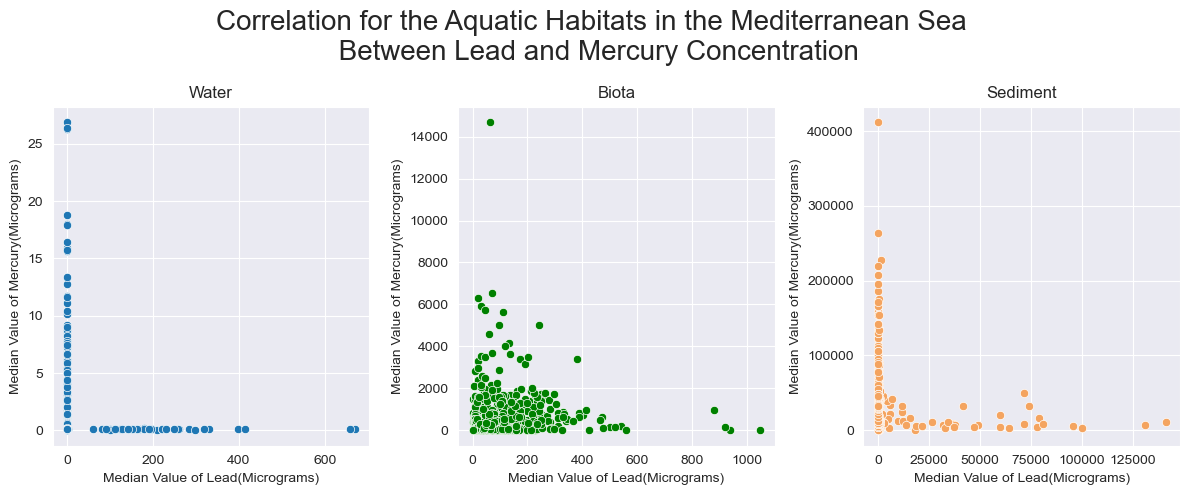

In [28]:
fig,ax = plt.subplots(1,3,figsize=(12,5))



plots = [sns.scatterplot(water_df,x='median_val_mercury',y='median_val_lead',ax=ax[0]),
    sns.scatterplot(biota_df,x='median_val_mercury',y='median_val_lead',ax=ax[1],color='g'),
    sns.scatterplot(sediment_df,x='median_val_mercury',y='median_val_lead',ax=ax[2],color='sandybrown')]

[plots[i].set_title(list(habi_dfs[i].Matrix)[0]) for i in np.arange(3)]
[plots[i].set_xlabel('Median Value of Lead(Micrograms)') for i in np.arange(3)]
[plots[i].set_ylabel('Median Value of Mercury(Micrograms)') for i in np.arange(3)]
fig.suptitle("Correlation for the Aquatic Habitats in the Mediterranean Sea \n Between Lead and Mercury Concentration",fontsize=20)
plt.tight_layout()

##### Quick Insight:
Water tends to be quite low in its concentration of lead and mercury. Biota shows some clustering around 0-1000 for mercury and 0-200 for lead. Also, some sediments had a higher concentration of lead and mercury, when lead was low, mercury was at its highest. Ultimately, there seems to be no correlation between the two.


## Analysis on Coralligenous formations in the Mediterranean

**Context:**  
- The owners of this data are the Joint Nature Conservation Committee(JNCC)
- **Coralligenous** refers to a specific type of marine habitat made up of elements that create hard surfaces that  sea creatures live on.

In [29]:
num_rows_mhabi = marine_habitats.shape[0]
num_cols_mhabi = marine_habitats.shape[1]


In [30]:
first_record = marine_habitats.sort_values(by='eventdate')['eventdate'].min()
last_record = marine_habitats.sort_values(by='eventdate')['eventdate'].max()

first_record,last_record



('1956-01', '2019-04')

##### Observation:
Its seems that the timeframe for this data is from 1956-2019, a 63 year diffrence. Is there data for every year?

In [31]:
# finding the years that have data within this timeframe
years_with_data = np.array(sorted(pd.unique(marine_habitats.year)))
years_with_data

array([1956, 1986, 1989, 1990, 1991, 1994, 1996, 1997, 1998, 1999, 2000,
       2002, 2003, 2004, 2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013,
       2014, 2017, 2018, 2019])

##### Observation:
It seems that there were inconsistencies in the data collection process. I'm curious about the trend in data collection since the first record(i.e. 1956).

In [32]:
# finding the average and standard deviation on how often did JNCC tended
# to collect or find data since 1956
mean_data_recs =  int(round(np.mean(np.diff(years_with_data)),0))
std_data_recs = int(round(np.std(np.diff(years_with_data)),0))
print(f"Since 1956, JNCC collects data every {mean_data_recs} years on average and with a standard deviation of {std_data_recs} years \nfor the Mediterranean Sea.")



Since 1956, JNCC collects data every 3 years on average and with a standard deviation of 6 years 
for the Mediterranean Sea.


##### Vizulize the Trend in Data Collection by Year

In [33]:
date_records_count_year_df = marine_habitats.groupby('year').count().sort_values('title',ascending=False).reset_index()
date_records_count_year_df.head() # the columns values are essentially the count

,year,gid,title,eventdate,mindepth,maxdepth,seabedtype,sampling_method,comments,geometry
0,2011,729,729,729,729,729,729,729,729,729
1,2010,489,489,489,489,489,489,489,489,489
2,2014,276,276,276,276,276,276,276,276,276
3,2013,157,157,157,157,157,157,157,157,157
4,2012,122,122,122,122,122,122,122,122,122


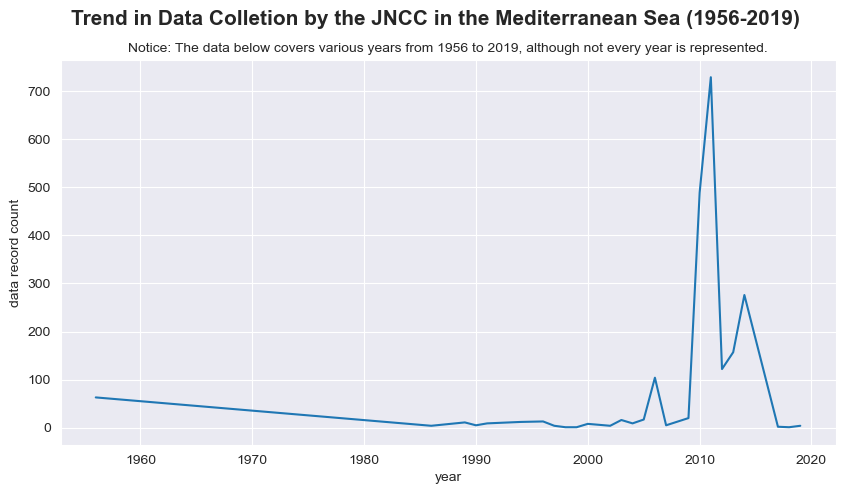

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(date_records_count_year_df,x='year',y='gid')


plt.title('Notice: The data below covers various years from 1956 to 2019, although not every year is represented.',fontsize=10)
plt.ylabel('data record count')
plt.suptitle('Trend in Data Colletion by the JNCC in the Mediterranean Sea (1956-2019)', fontsize=15,weight='bold')
plt.show()

##### Quick Insight:
There was a peak in data records(i.e 700+) in 2011.

## Sampling Methods and Depth Values

#### Facet the trend of each sampling method

In [35]:
sampling_methods_all = list(pd.unique(marine_habitats.sampling_method))
sampling_methods_all

['rov',
 'diver',
 'underwater cameras',
 'inapplicable',
 'beam trawl',
 'smith-mcintyre grab',
 'van veen grab',
 'sediment dredges',
 'rock dredges',
 'ponar grab',
 'box corer']

In [36]:
def get_sampling_methods_counts(samp_method):
    """
    string -> dataframe
    (made for faceting)
    excpects a sampling method
    returns a dataframe with all the years where sampling method occured
    and its counts for each of those years
    
    """
    
    # manipulating dataframe of each sampling method and the count of it in each year

    sampling_method_counts_dfs = [pd.DataFrame(marine_habitats.loc[marine_habitats['year'] == year]
                                .groupby('sampling_method')['gid'].count())# gets the count of each sampling method for each year
                                               .assign(year=year) #adds a column of the respective year
                                                  .reset_index()
                              for year in years_with_data]

    sampling_method_count_yearly = pd.concat(sampling_method_counts_dfs).set_index(np.arange(51))
    sampling_method_count_yearly.rename(columns={'gid':'count'},inplace=True)
    output_df = sampling_method_count_yearly.loc[sampling_method_count_yearly['sampling_method'] == samp_method]
    return output_df

get_sampling_methods_counts('sediment dredges') #example output

,sampling_method,count,year
0,sediment dredges,63,1956
14,sediment dredges,16,2003
28,sediment dredges,3,2010


In [37]:
# 'box corer' and 'beam trawl' only had one point of data. I will be removing them from the bulk of sampling methods
# for the sake of visualizing what has been used most over time.

sampling_methods_with_data = list(pd.unique(marine_habitats.sampling_method))
sampling_methods_with_data.remove('beam trawl')
sampling_methods_with_data.remove('box corer')


In [38]:
# color palettes to iterate over when assgining unique colors to geometric objects on plots


# for lineplots
palette_dark = ['rosybrown','firebrick','darkgreen','mediumvioletred','darkgoldenrod',
          'sienna','darkcyan','dodgerblue','slategray','olive','k']


import random #to add some randomness to the color selction
# for a barplot
catergorical_pallete = ['#ADD8E6',  # Light Blue
    '#87CEEB',  # Sky Blue
    '#40E0D0',  # Turquoise
    '#2E8B57',  # Sea Green
    '#556B2F',  # Olive Green
    '#90EE90',  # Light Green
    '#F5DEB3',  # Sandy Beige
    '#E2725B',  # Terra Cotta
    '#FFD700',  # Gold
    '#FF7F50',  # Coral Pink
    '#FF4040',  # Coral Red
    '#A020F0',  # Sea Urchin Purple
    '#D3D3D3',  # Pearl Gray
    'silver',  
    '#006400'   # Dark Green
] 



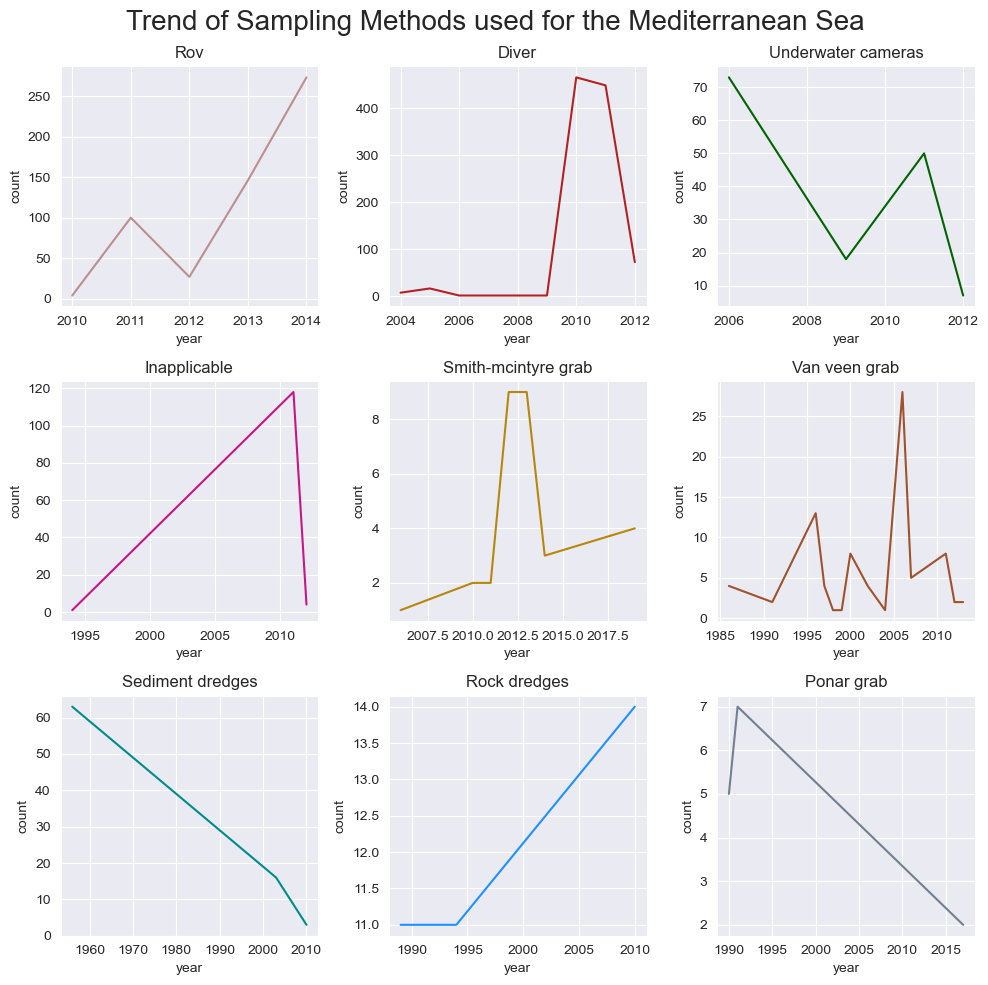

In [39]:
fig, ax = plt.subplots(3,3,figsize=(10,10))

plots = [sns.lineplot(get_sampling_methods_counts(samp_method),x='year',y='count',color=palette_dark[i],
                      ax=ax[i//3][i%3])
         for i,samp_method in enumerate(sampling_methods_with_data)]


[plots[i].set_title(sampling_methods_with_data[i].capitalize()) for i in np.arange(len(sampling_methods_with_data))]

plt.suptitle('Trend of Sampling Methods used for the Mediterranean Sea',fontsize=20)

plt.tight_layout()

##### Insight:
The use of ROVs (remotely operated vehicles) has increased in recent years. From 2009 to 2011, divers were a popular sampling method, but their usage declined before satring 2012. Similarly, sediment dredges showed a consistent decline since their introduction in 1956 and were last used in 2010.

Regarding the grabing methods, they have been used more recently but haven't experienced a notable increase in adoption. If the Van Veen grab had was the mode in 1995-2005, could we say that the Smith-McIntyre Grab will have similar status in the future?

#### Inquire on the Depth 

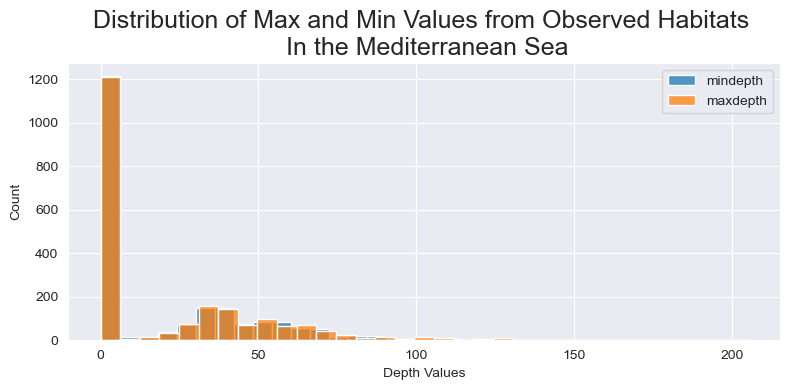

In [40]:
fig,ax = plt.subplots(figsize=(8,4))
sns.histplot(marine_habitats,x='mindepth',ax=ax,label='mindepth')
sns.histplot(marine_habitats,x='maxdepth',ax=ax,label='maxdepth')
plt.title('Distribution of Max and Min Values from Observed Habitats \n In the Mediterranean Sea',fontsize=18)
plt.xlabel('Depth Values')
plt.legend()
plt.tight_layout()

##### Observation:
At first glance it appears that the depth values match each other however, using this plot as a visual aid, we can observe that some values tend to differ from each other. Particularly around the 25-80 values.

##### Faceted Correlations for Sampling Methods at Minimum and Maximum Depth

In [41]:
marine_habitats.head()

,gid,title,eventdate,mindepth,maxdepth,seabedtype,sampling_method,comments,geometry,year
0,1,sample,2011-05,29.0,29.0,Coralligenous platforms,rov,Coralligenous platforms,MULTIPOINT (3.14697 42.51434),2011
1,2,sample,2011-05,24.0,24.0,Coralligenous platforms,rov,Coralligenous platforms,MULTIPOINT (3.16865 42.46627),2011
2,3,sample,2011-05,37.0,37.0,Coralligenous platforms,rov,Coralligenous platforms,MULTIPOINT (3.18117 42.44230),2011
3,4,sample,2011-05,30.0,30.0,Coralligenous platforms,rov,Coralligenous platforms,MULTIPOINT (3.17046 42.45876),2011
4,5,sample,2011-05,47.0,47.0,Coralligenous platforms,rov,Coralligenous platforms,MULTIPOINT (3.14721 42.51818),2011


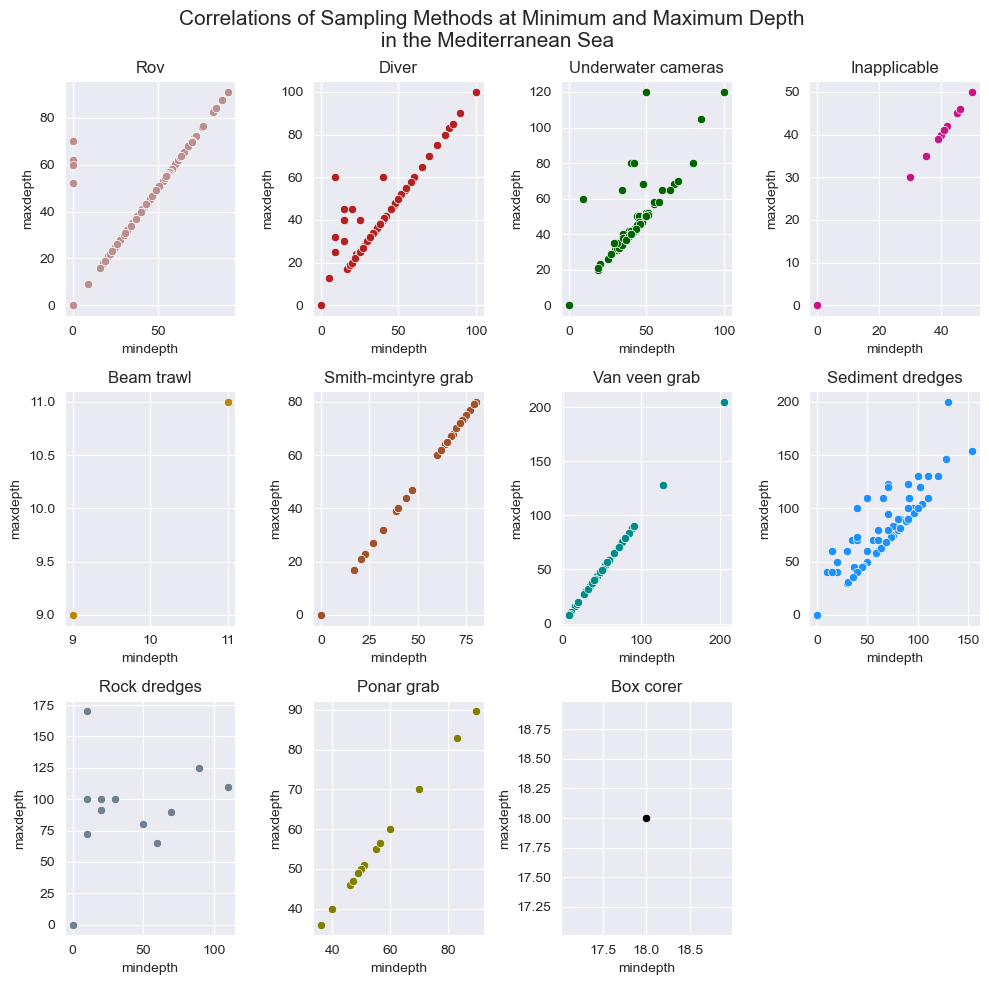

In [42]:
fig,ax = plt.subplots(3,4,figsize=(10,10))


plots = [sns.scatterplot(marine_habitats.loc[marine_habitats['sampling_method'] == method],x='mindepth',y='maxdepth',
                     color=palette_dark[i],ax=ax[i//4][i%4])
        for i,method in enumerate(sampling_methods_all)]
[plots[i].set_title(sampling_methods_all[i].capitalize()) for i in np.arange(len(sampling_methods_all))]
fig.delaxes(ax[2,3]) #delete the last plot as there is only 11 sampling methods

plt.suptitle('Correlations of Sampling Methods at Minimum and Maximum Depth \n in the Mediterranean Sea',fontsize=15)
plt.tight_layout()

##### Insight:
It appears that most sampling methods can reach a minimum depth of zero. Although, sampling methods used less than three times haven't reached a depth of zero yet. If they were used more frequently, could they reach greater depths? Also, both dredging methods seem to have a range of depth and height values, and they show more variability compared to the others, which show more linear patterns. Dredging utilizes robust machinery, do marine biologists use dredging when they want to acquire a wider range of samples?

To discuss the linear correlation observed in other methods, they are generally smaller in size compared to dredging machines. Could they be a more suitable approach for marine biologists when analyzing a certain habitat at specific depths? Also, the Van Veen grab method is able to reach greater depths compared to others, especially sediment dredging. It shows a positive correlation even with high minimum depth values. Is this method used by marine biologists specifically when they need to retrieve samples from greater depths, that is in the Mediterranean Sea?

#### Trend of seabeds found in 1956-2019
**Context:**
There isn't data for every year in this time frame, so i find that it will be  best to treat the years as categorical data for this section.

In [43]:
# store the types of seabed and the count of them
# for iteration, mainly.
seabed_types = list(pd.unique(marine_habitats.seabedtype))
num_seabedtypes = len(pd.unique(marine_habitats.seabedtype))



In [44]:
def num_sedbed_in_year(year,seabed_type):
    """
    int string -> int
    
    expects year and seabedtype
    returns number of times that seabdetype was found in the given year
    helper function for manipulating a dataframe
    
    """
    
  
    num_occ = len(marine_habitats.loc[(marine_habitats['year'] == year) & (marine_habitats['seabedtype'] == seabed_type)] )
    return num_occ 



In [45]:
def seabed_percent_year(seabed_type):
    """
    string -> dataframe
    
    expects a seabedtype 
    returns a dataframe with the the years it was observed
    and it the percent it made up for that year of observed seabeds
    helper function for plotting.
    
    """
    bedtypes_years_t = pd.unique(marine_habitats.loc[marine_habitats['seabedtype'] == seabed_type].sort_values(by='year')['year']) 

    stat_for_years_t = [round(len(marine_habitats.loc[(marine_habitats['year'] == year) & (marine_habitats['seabedtype'] == seabed_type)])
                              /len(marine_habitats.loc[(marine_habitats['year'] == year) ])* 100,2)
         for year in bedtypes_years_t]
    bedtype_stat_df = pd.DataFrame({'year':bedtypes_years_t,'seabed':seabed_type,'percent':stat_for_years_t})
    bedtype_stat_df
    return bedtype_stat_df




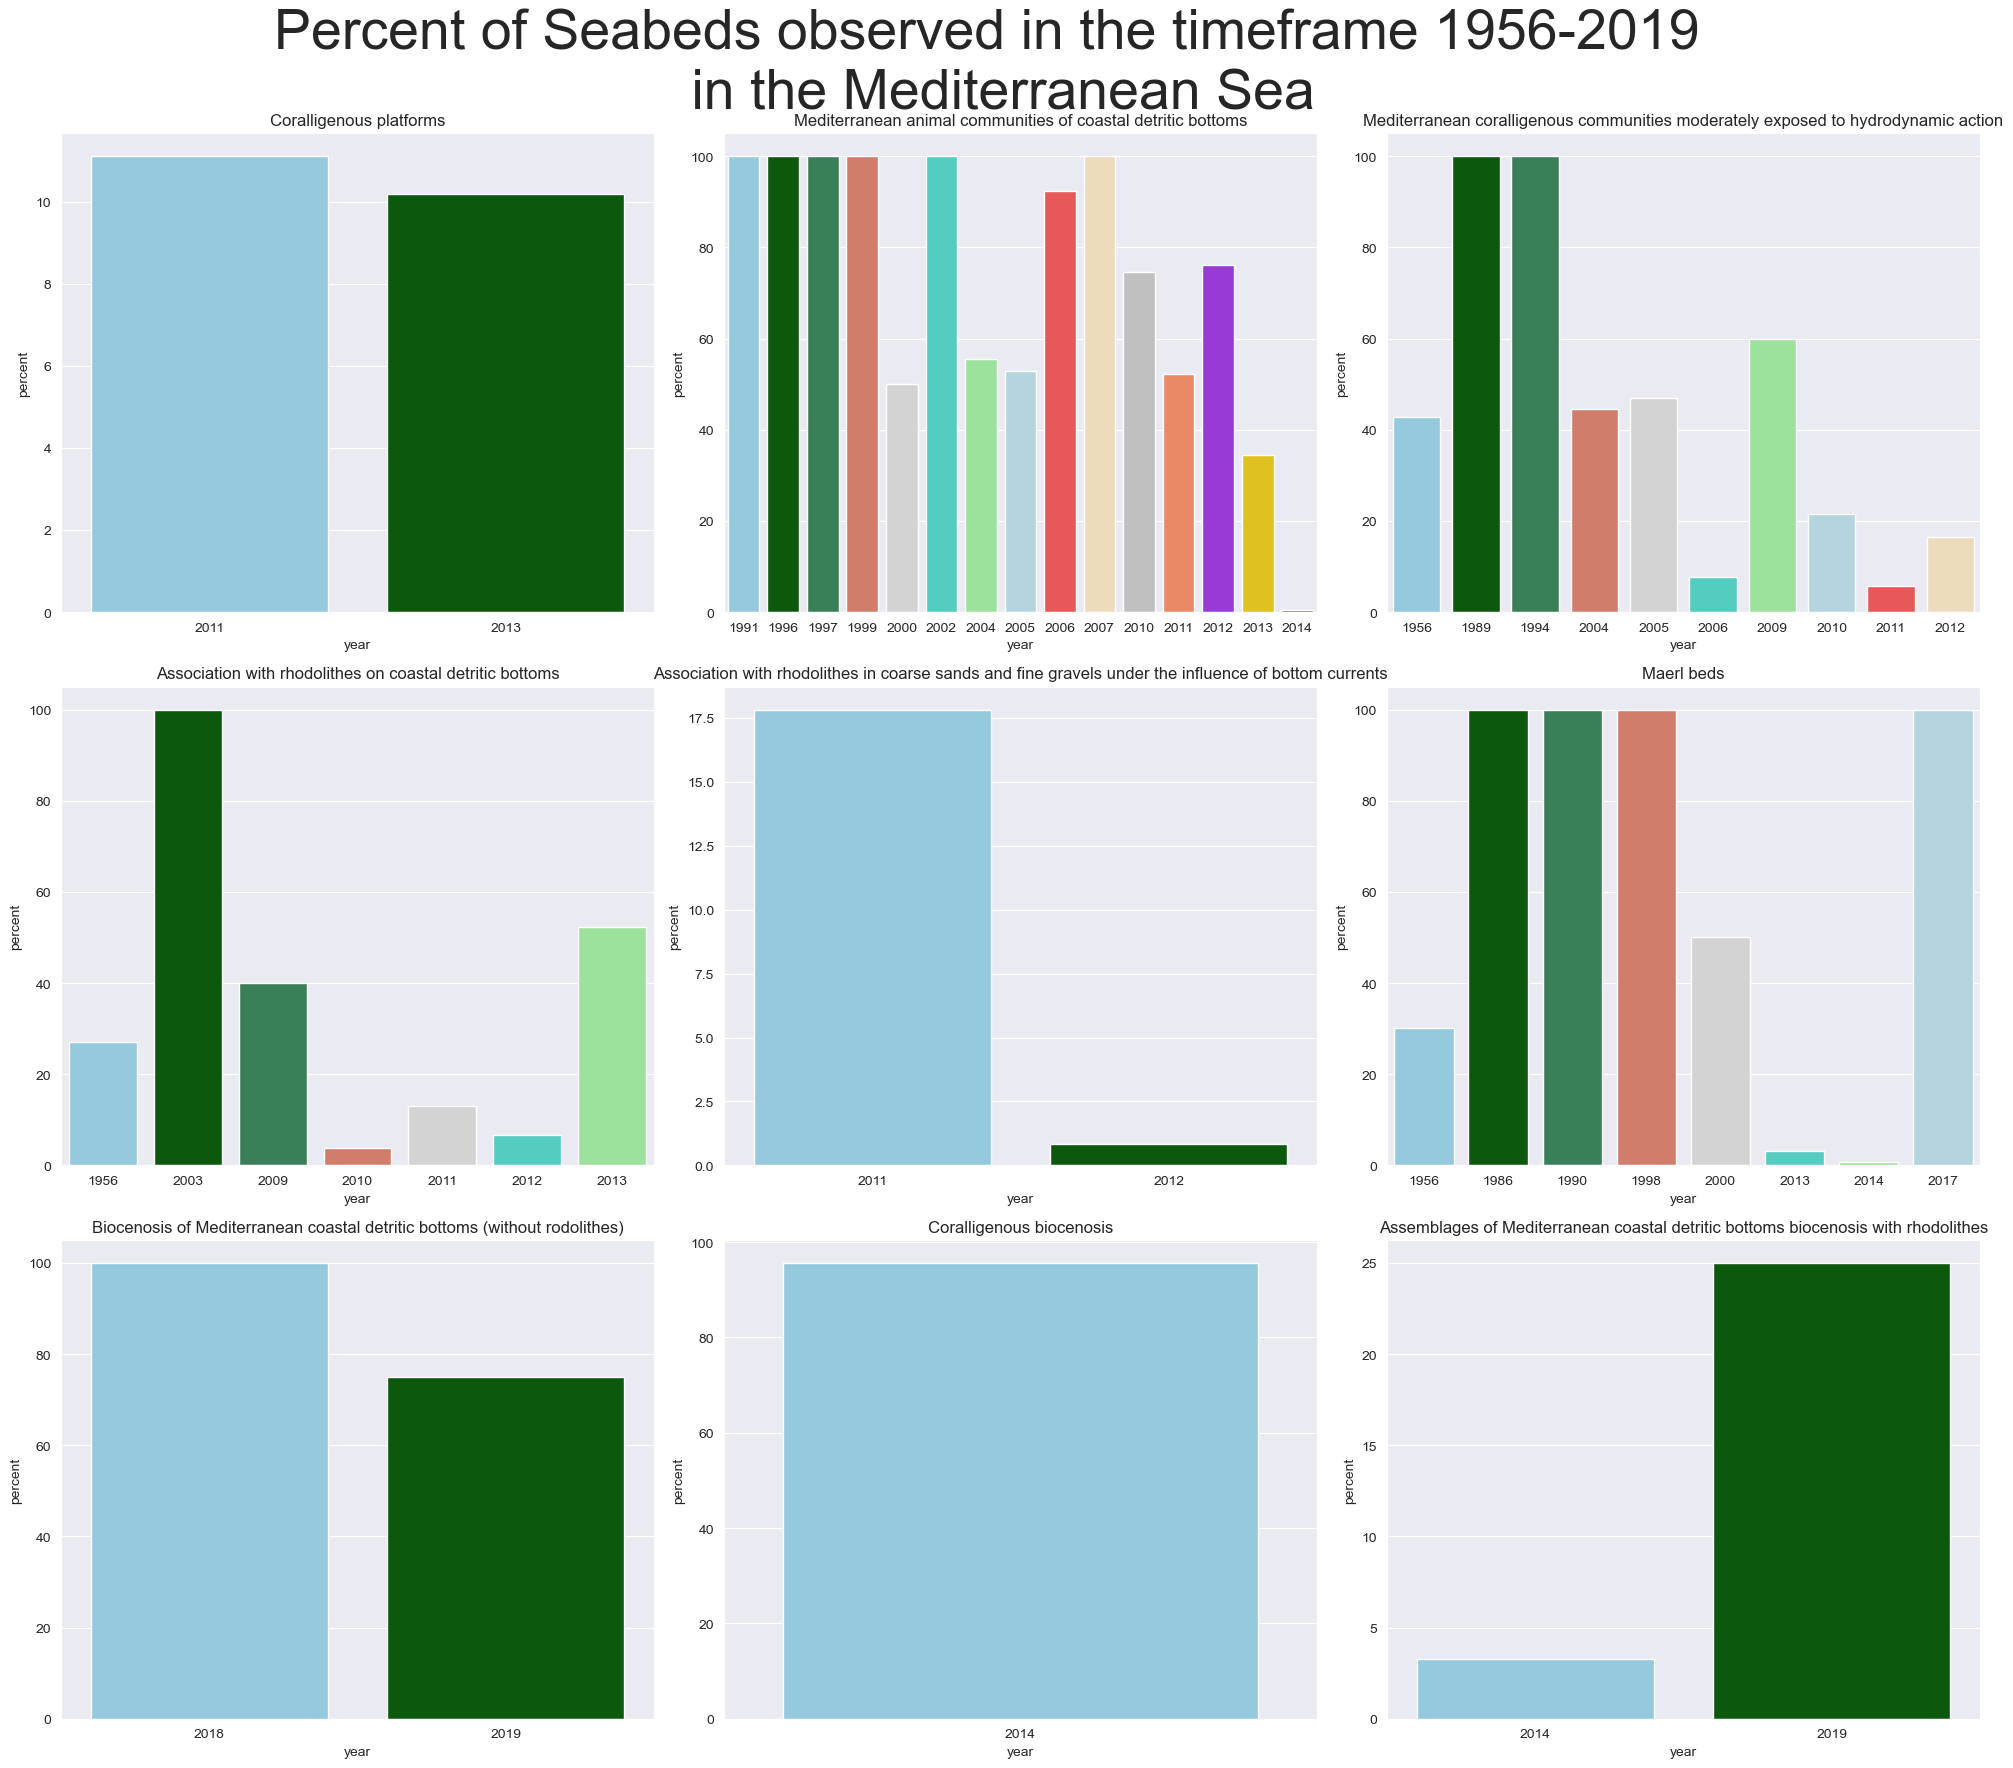

In [46]:

def seabed_stat_yearly(seabed_type,facet=False):
    """
    [string] or string facet=boolean -> subplots
    
    
    expects a seabed type and outputs a bar plot for the seabed type(s) and the percent it made up for all the years
    it was observed out of all dataset
    if facet=True the it will expcets list that can range from 2-9 
    9 being the maximium(i.e. there is only being 9 types of sea beds present in this dataset)
    otehrwise, it will output single plot for a single seabed type

    
    
    """
    
    
    if facet and type(seabed_type) == list:
    # manipulate a dataframe for the given seabedtype with the year and percent it made up for the that year
        seabed_dfs_list = [seabed_percent_year(seabed) for seabed in seabed_type]

        # defien the length of the given list
        len_seabed_type = len(seabed_type)
       
       
        #create subplots based of the number off the seabed types given
        fig, ax = plt.subplots(
                               3,
                               3,
                               
                               #NOTE:
                               #The expressions below did not work when the list length fell somewhere 2-6
                               #but im choosing to leave it here commented out just for refrence on how i was approaching
                               #for a more felxible outcome of subplots. Essentially it was suppose to configure 
                               #the columns displayed in the outputted figure.
                               
                               
                               #Attempted approach:
                               
                               #len_seabed_type//3+1, (rows)
                               #the denominator stays as three because the maximum size of list is 9
                               #and it is added by one so it can create even number of rows for the given length of the list
                               
                               #np.repeat([1,2,3],3)[len_seabed_type-1], (columns)
                               
                               #This expression will allow for a range to be made for 
                               #all the possible number of columns then acess that list with the length of the given list
                               #which is subtracted by one because the length of the the np.repate expression is 8
                               #this will allow for this function to accept a length of 9
                          
                               
                               figsize=(20,18))
        
        # Using a barplot here instead of lineplot because since there isn't data for every year
        #have random colors for the bar colors very time it is ran
        random.shuffle(catergorical_pallete)
       
        plots = [sns.barplot(df,x='year',y='percent',ax=ax[i//3][i%3],palette=catergorical_pallete) 
                 for i,df in enumerate(seabed_dfs_list)]
        
        # delete plots that dont have data
    
        if len(plots) == 2:
                plt.delaxes(ax[0,2])
                plt.delaxes(ax[1,0])
                plt.delaxes(ax[1,1])
                plt.delaxes(ax[1,2])
                plt.delaxes(ax[2,0])
                plt.delaxes(ax[2,1])
                plt.delaxes(ax[2,2])
        elif len(plots) <= 3:
            
                plt.delaxes(ax[1,0])
                plt.delaxes(ax[1,1])
                plt.delaxes(ax[1,2])

                plt.delaxes(ax[2,0])
                plt.delaxes(ax[2,1])
                plt.delaxes(ax[2,2])
        elif len(plots) == 4:
            
                plt.delaxes(ax[1,1])
                plt.delaxes(ax[1,2])
                plt.delaxes(ax[2,0])
                plt.delaxes(ax[2,1])
                plt.delaxes(ax[2,2])
        elif len(plots) == 5:
            
                
                plt.delaxes(ax[1,2])
                plt.delaxes(ax[2,0])
                plt.delaxes(ax[2,1])
                plt.delaxes(ax[2,2])
        elif len(plots) <= 6 :
            

                plt.delaxes(ax[2,0])
                plt.delaxes(ax[2,1])
                plt.delaxes(ax[2,2])
        elif len(plots) == 7:
            
                plt.delaxes(ax[2,1])
                plt.delaxes(ax[2,2])
        elif len(plots) == 8:
            plt.delaxes(ax[2,2])
            

            
            
        #add titles for the plots
            
        [plots[i].set_title(seabed_type[i]) for i in np.arange(len_seabed_type)]
        plt.suptitle(f'Percent of Seabeds observed in the timeframe 1956-2019 \n in the Mediterranean Sea',fontsize=40)
        
        
        plt.tight_layout()
        
    else:
         bedtypes_years = pd.unique(marine_habitats.loc[marine_habitats['seabedtype'] == seabed_type].sort_values(by='year')['year'])
         stat_for_years = [round(len(marine_habitats.loc[(marine_habitats['year'] == year) & (marine_habitats['seabedtype'] == seabed_type)])/len(marine_habitats)* 10000,2)
                            for year in bedtypes_years]
         bedtype_stat_df = pd.DataFrame({'year':bedtypes_years,'seabed':seabed_type,'percent':stat_for_years})
         sns.barplot(bedtype_stat_df,x='year',y='percent',palette=catergorical_pallete)
         plt.title(f"Percent {seabed_type} observed in the timeframe 1956-2019 \n in the Mediterranean Sea",fontsize=15)
        
         
        
    
seabed_stat_yearly(seabed_types,facet=True)


##### Insight:
Looking at seabed types observed between 1956 and 2019 in the plot above, it has interesting trends. Sea beds near the coast (second plot) show a consistent increase in observations since 1991, but since the last observation, there have been recurrences. Also, there was a significant decrease in rhodoliths within coarse sands and gravel (fifth plot) between 2011 and 2012, approximately a 15% decrease.

In 2014, coralligenous biocenosis almost reached 100% of observed sea beds. Interestingly, when examining other sea beds where there was data for 2014, we can see that sea beds with 2014 data made a smaller amount of the total percentage.

The last year where data were recorded was 2019. Looking at the seabeds that have data for this year (i.e., seventh and ninth plot), they both are coastal. Does this imply that retrieving data from the coast in the Mediterranean Sea is easier?

## Geographic Analysis


##### Context:
The data for the Contaminants (i.e. lead and mercury) was collected from 2015-2021. 

In [47]:
#define the sub seas and the total of them
sub_seas = list(pd.unique(medi_body.name))
num_seas = len(sub_seas)


### Dynamic Mediterranean Sea Analysis

In [48]:
def sea_data(sea_name='',conts=False,ma=False):
    """
     
    sea_name=string all_conts=boolean MA=boolean -> plot
    can take up 30+ to load its output
    by default it will return the whole Mediterranean Sea with all data points(i.e. the expression sea_data())
    sea_name=string, expects a sea that exist in the Mediterranean
    and will return a projection of that sea 
    all_conts, if set to true will display the data for all contaminants(i.e. lead and mercury)
    
    
    """
    
    
    # if the desire is to see all contaminants with marine habitats this will pass
    if conts and ma:
           
        #obtain the xmin,xmax,ymin,ymax
    
        sea_xmin = float(medi_body.loc[medi_body['name'] == sea_name].min_x)
        sea_xmax = float(medi_body.loc[medi_body['name'] == sea_name].max_x)
        sea_ymin = float(medi_body.loc[medi_body['name'] == sea_name].min_y)
        sea_ymax = float(medi_body.loc[medi_body['name'] == sea_name].max_y)
        
        

        fig,ax = plt.subplots(figsize=(15,10))

        world_bound.plot(ax=ax,color='darkgrey',edgecolor='darkgrey')
        red_sea.plot(ax=ax,color='deepskyblue')
        nao.plot(ax=ax,color='deepskyblue')

        [land_bounds[i].plot(ax=ax,color='tan',edgecolor='k') for i in np.arange(num_land_bounds)] #plots each country that share the border with the Mediterranean

        

        #code for adding labels for the countries
        #the conditionals will place country's labels at or near their center(centroid) 

        [plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Slovenia'].NAME_ENGLI # fit the label for Slovenia
                else 
                     plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Croatia'].NAME_ENGLI # fit the label for Croatia
         else 
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Montenegro'].NAME_ENGLI # fit the label for Montenegro
     else 
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Albania'].NAME_ENGLI # fit the label for Albania
     else 
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Bosnia'].NAME_ENGLI # fit the label for Bosnia and Herzegovina
     else  
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Israel'].NAME_ENGLI  # fit the label for Israel 
     else 
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.8,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Lebanon'].NAME_ENGLI  # fit the label for Lebanon
     else 
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y-0.1),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].SQKM[0] <= 9226.847 # to fit the label for Cyprus and Malta
     else 
     plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.7,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Tunisia'].NAME_ENGLI # fit the label for Tunisia
     else 
     plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1.2,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Greece'].NAME_ENGLI # fit the label for Greece
     else plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
                   ha='center',fontsize=8,fontstyle='italic',annotation_clip=True) #to fit the label for bigger countries
     for i in np.arange(num_land_bounds)]
         
        
        
        # code to add labels to the all the sub-seas
        [plt.annotate(sub_seas[i],(medi_body.longitude[i],medi_body.latitude[i]),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)  
        for i in np.arange(num_seas)]
        
        #geo data plotting
        medi_sea = medi_body.plot(ax=ax,color='deepskyblue',edgecolor='lightskyblue')
        MA_points = marine_habitats.plot(ax=ax,cmap='ocean_r',column='year',legend=True,
                                         legend_kwds={'label':'Marine Habitats Observed (1956-2019)'},
                                         markersize=20)
        
        lead_points = medi_lead_filtered.plot(ax=ax,color='darkviolet',markersize=30,label='lead',alpha=0.4)
        mercury_points = medi_mercury_filtered.plot(ax=ax,color='orangered',markersize=30,label='mercury',alpha=0.4)
        
        
        #zooms in to the area of interest 
        
        #configure certain sub-seas maps shape by adjusting the min and max values 
        
        #what caused these condtions is the fact that some annotations fell outside of the map when zoomed in
        #Ultimately, it so adjacent country and sea annotations fit accordingly
        if (sea_name == 'Tyrrhenian Sea') | (sea_name == 'Aegean Sea'):
            plt.axis([sea_xmin -2.5,sea_xmax +2.7,sea_ymin,sea_ymax]) 
            
        elif (sea_name == 'Adriatic Sea')  | (sea_name == 'Mediterranean Sea - Western Basin'):
            plt.axis([sea_xmin -1,sea_xmax +1,sea_ymin,sea_ymax]) 
        elif (sea_name == 'Mediterranean Sea - Eastern Basin'):
            plt.axis([sea_xmin ,sea_xmax ,sea_ymin,sea_ymax+4])
             
        else:
            plt.axis([sea_xmin,	sea_xmax,sea_ymin,sea_ymax]) 
        
        
        
    
        
        # create an empty plot that allows to add a label for the border that seprates the seas
        plt.plot([],[],color='lightskyblue',label='sea border')
        
        #add interpretability to the map
        plt.legend(title='Contaminants',markerscale=2)
          #remove ticks on both axes
        plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
  
        plt.suptitle(f'Distribution of Contaminants Mapped with Marine Habitats in the {sea_name}',
                     fontweight='bold',
                     fontstyle='oblique',fontsize=17,y=0.85,x=0.43)
        fig.set_facecolor('sienna')
        plt.show()
        
    # if the desire is to see all contaminants this will pass
    elif conts:
        #check to see if a seaname was passed which will them zoom into the sea with all contaminants
        if len(sea_name) != 0:
            
        #obtain the xmin,xmax,ymin,ymax
    
            sea_xmin = float(medi_body.loc[medi_body['name'] == sea_name].min_x)
            sea_xmax = float(medi_body.loc[medi_body['name'] == sea_name].max_x)
            sea_ymin = float(medi_body.loc[medi_body['name'] == sea_name].min_y)
            sea_ymax = float(medi_body.loc[medi_body['name'] == sea_name].max_y)
            fig,ax = plt.subplots(figsize=(15,10))

            world_bound.plot(ax=ax,color='darkgrey',edgecolor='darkgrey')
            red_sea.plot(ax=ax,color='deepskyblue')
            nao.plot(ax=ax,color='deepskyblue')

            [land_bounds[i].plot(ax=ax,color='tan',edgecolor='k') for i in np.arange(num_land_bounds)] #plots each country that share the border with the Mediterranean

        

            #code for adding labels for the countries
            #the conditionals will place country's labels at or near their center(centroid) 

            [plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Slovenia'].NAME_ENGLI # fit the label for Slovenia
             else 
                 plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Croatia'].NAME_ENGLI # fit the label for Croatia
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Montenegro'].NAME_ENGLI # fit the label for Montenegro
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Albania'].NAME_ENGLI # fit the label for Albania
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Bosnia'].NAME_ENGLI # fit the label for Bosnia and Herzegovina
             else  
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Israel'].NAME_ENGLI  # fit the label for Israel 
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.8,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Lebanon'].NAME_ENGLI  # fit the label for Lebanon
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y-0.1),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].SQKM[0] <= 9226.847 # to fit the label for Cyprus and Malta
             else 
                 plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.7,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Tunisia'].NAME_ENGLI # fit the label for Tunisia
             else 
                 plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1.2,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Greece'].NAME_ENGLI # fit the label for Greece
             else 
                 plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
                   ha='center',fontsize=8,fontstyle='italic',annotation_clip=True) #to fit the label for bigger countries
             for i in np.arange(num_land_bounds)]
         
        
            # code to add labels to the all the sub-seas
            [plt.annotate(sub_seas[i],(medi_body.longitude[i],medi_body.latitude[i]),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True) 
            for i in np.arange(num_seas)]
        
            #geo data plotting
            medi_sea = medi_body.plot(ax=ax,color='deepskyblue',edgecolor='lightskyblue')
            lead_points = medi_lead_filtered.plot(ax=ax,color='darkviolet',markersize=30,label='lead',alpha=0.4)
            mercury_points = medi_mercury_filtered.plot(ax=ax,color='orangered',markersize=30,label='mercury',alpha=0.4)
         
            #zooms in to the area of interest 
        
            #configure certain sub-seas maps shape by adjusting the min and max values 
        
            #what caused these condtions is the fact that some annotations fell outside of the map when zoomed in
            #Ultimately, it so adjacent country and sea annotations fit accordingly
            if (sea_name == 'Tyrrhenian Sea') | (sea_name == 'Aegean Sea'):
                plt.axis([sea_xmin -2.5,sea_xmax +2.7,sea_ymin,sea_ymax]) 
            
            elif (sea_name == 'Adriatic Sea')  | (sea_name == 'Mediterranean Sea - Western Basin'):
                plt.axis([sea_xmin -1,sea_xmax +1,sea_ymin,sea_ymax]) 
            elif (sea_name == 'Mediterranean Sea - Eastern Basin'):
                plt.axis([sea_xmin ,sea_xmax ,sea_ymin,sea_ymax+4])
             
            else:
                plt.axis([sea_xmin,	sea_xmax,sea_ymin,sea_ymax]) 
        
            # create an empty plot that allows to add a label for the border that seprates the seas
            plt.plot([],[],color='lightskyblue',label='sea border')
        
            #add interpretability to the map
            plt.legend(title='Data',markerscale=2)
            #remove the tick on both axes
            plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
  
            plt.suptitle(f'Distribution of Contaminants in the {sea_name}',
                     fontweight='bold',
                     fontstyle='oblique',fontsize=17,y=0.91)
            fig.set_facecolor('sienna')
            plt.show()
        #otherwise it return the whole map with all contaminants
        else:
       
            fig,ax = plt.subplots(figsize=(15,10))

            world_bound.plot(ax=ax,color='darkgrey',edgecolor='darkgrey')
            red_sea.plot(ax=ax,color='deepskyblue')
            nao.plot(ax=ax,color='deepskyblue')

            [land_bounds[i].plot(ax=ax,color='tan',edgecolor='k') for i in np.arange(num_land_bounds)] #plots each country that share the border with the Mediterranean

        

            #code for adding labels for the countries
            #the conditionals will place country's labels at or near their center(centroid) 

            [plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Slovenia'].NAME_ENGLI # fit the label for Slovenia
                else 
                     plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Croatia'].NAME_ENGLI # fit the label for Croatia
             else 
             plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Montenegro'].NAME_ENGLI # fit the label for Montenegro
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Albania'].NAME_ENGLI # fit the label for Albania
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Bosnia'].NAME_ENGLI # fit the label for Bosnia and Herzegovina
             else  
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Israel'].NAME_ENGLI  # fit the label for Israel 
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.8,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Lebanon'].NAME_ENGLI  # fit the label for Lebanon
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y-0.1),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].SQKM[0] <= 9226.847 # to fit the label for Cyprus and Malta
             else 
                 plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.7,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Tunisia'].NAME_ENGLI # fit the label for Tunisia
             else 
                 plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1.2,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Greece'].NAME_ENGLI # fit the label for Greece
             else plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
                   ha='center',fontsize=8,fontstyle='italic',annotation_clip=True) #to fit the label for bigger countries
             for i in np.arange(num_land_bounds)]
         
        
            # code to add labels to the all the sub-seas
            [plt.annotate(sub_seas[i],(medi_body.longitude[i],medi_body.latitude[i]),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True) 
            for i in np.arange(num_seas)]
        
            #geo data plotting
            medi_sea = medi_body.plot(ax=ax,color='deepskyblue',edgecolor='lightskyblue')
            lead_points = medi_lead_filtered.plot(ax=ax,color='#8B451966',markersize=30,label='lead',alpha=0.4)
            mercury_points = medi_mercury_filtered.plot(ax=ax,color='gray',markersize=30,label='mercury',alpha=0.4)
        
         
            #zooms onto the Mediterranean Sea
            plt.axis([-5,36,25,47]) 
        
            # create an empty plot that allows to add a label for the border that seprates the seas
            plt.plot([],[],color='lightskyblue',label='sea border')
        
            #add interpretability to the map
            plt.legend(title='Data',markerscale=2)
             #remove the tick on both axes
            plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
  
            plt.suptitle(f'Distribution of Contaminants in the Mediterranean Sea',
                     fontweight='bold',
                         fontstyle='oblique',fontsize=17,y=0.91)
            fig.set_facecolor('sienna')
            plt.show()
        
        
        
   # if the desire is to see marine habitats this will pass
    elif ma:
        
        #check to see if a seaname was passed which will them zoom into the sea with marine habitats 
        if len(sea_name) != 0:
            
        #obtain the xmin,xmax,ymin,ymax
    
            sea_xmin = float(medi_body.loc[medi_body['name'] == sea_name].min_x)
            sea_xmax = float(medi_body.loc[medi_body['name'] == sea_name].max_x)
            sea_ymin = float(medi_body.loc[medi_body['name'] == sea_name].min_y)
            sea_ymax = float(medi_body.loc[medi_body['name'] == sea_name].max_y)
            fig,ax = plt.subplots(figsize=(15,10))

            world_bound.plot(ax=ax,color='darkgrey',edgecolor='darkgrey')
            red_sea.plot(ax=ax,color='deepskyblue')
            nao.plot(ax=ax,color='deepskyblue')

            [land_bounds[i].plot(ax=ax,color='tan',edgecolor='k') for i in np.arange(num_land_bounds)] #plots each country that share the border with the Mediterranean

        

            #code for adding labels for the countries
            #the conditionals will place country's labels at or near their center(centroid) 

            [plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Slovenia'].NAME_ENGLI # fit the label for Slovenia
             else 
                 plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Croatia'].NAME_ENGLI # fit the label for Croatia
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Montenegro'].NAME_ENGLI # fit the label for Montenegro
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Albania'].NAME_ENGLI # fit the label for Albania
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Bosnia'].NAME_ENGLI # fit the label for Bosnia and Herzegovina
             else  
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Israel'].NAME_ENGLI  # fit the label for Israel 
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.8,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Lebanon'].NAME_ENGLI  # fit the label for Lebanon
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y-0.1),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].SQKM[0] <= 9226.847 # to fit the label for Cyprus and Malta
             else 
                 plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.7,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Tunisia'].NAME_ENGLI # fit the label for Tunisia
             else 
                 plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1.2,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Greece'].NAME_ENGLI # fit the label for Greece
             else 
                 plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
                   ha='center',fontsize=8,fontstyle='italic',annotation_clip=True) #to fit the label for bigger countries
             for i in np.arange(num_land_bounds)]
         
        
            # code to add labels to the all the sub-seas
            [plt.annotate(sub_seas[i],(medi_body.longitude[i],medi_body.latitude[i]),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True) 
            for i in np.arange(num_seas)]
        
            #geo data plotting
            medi_sea = medi_body.plot(ax=ax,color='deepskyblue',edgecolor='lightskyblue')
            MA_points = marine_habitats.plot(ax=ax,cmap='ocean_r',column='year',legend=True,
                                         legend_kwds={'label':'Marine Habitats Observed (1956-2019)'},
                                         markersize=30)
        
         
            #zooms in to the area of interest 
        
            #configure certain sub-seas maps shape by adjusting the min and max values 
        
            #what caused these condtions is the fact that some annotations fell outside of the map when zoomed in
            #Ultimately, it so adjacent country and sea annotations fit accordingly
            if (sea_name == 'Tyrrhenian Sea') | (sea_name == 'Aegean Sea'):
                plt.axis([sea_xmin -2.5,sea_xmax +2.7,sea_ymin,sea_ymax]) 
            
            elif (sea_name == 'Adriatic Sea')  | (sea_name == 'Mediterranean Sea - Western Basin'):
                plt.axis([sea_xmin -1,sea_xmax +1,sea_ymin,sea_ymax]) 
            elif (sea_name == 'Mediterranean Sea - Eastern Basin'):
                plt.axis([sea_xmin ,sea_xmax ,sea_ymin,sea_ymax+4])
             
            else:
                plt.axis([sea_xmin,	sea_xmax,sea_ymin,sea_ymax]) 
        
            # create an empty plot that allows to add a label for the border that seprates the seas
            plt.plot([],[],color='lightskyblue',label='sea border')
        
            #add interpretability to the map
            plt.legend(title='Data',markerscale=2)
            #remove the tick on both axes
            plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
  
            plt.suptitle(f'Distribution of Marine Habitats in the {sea_name}',
                     fontweight='bold',
                     fontstyle='oblique',fontsize=17,y=0.85,x=0.43)
            fig.set_facecolor('sienna')
            plt.show()
        #otherwise it return the whole map with marine habitats 
        else:
       
            fig,ax = plt.subplots(figsize=(15,10))

            world_bound.plot(ax=ax,color='darkgrey',edgecolor='darkgrey')
            red_sea.plot(ax=ax,color='deepskyblue')
            nao.plot(ax=ax,color='deepskyblue')

            [land_bounds[i].plot(ax=ax,color='tan',edgecolor='k') for i in np.arange(num_land_bounds)] #plots each country that share the border with the Mediterranean

        

            #code for adding labels for the countries
            #the conditionals will place country's labels at or near their center(centroid) 

            [plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Slovenia'].NAME_ENGLI # fit the label for Slovenia
                else 
                     plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Croatia'].NAME_ENGLI # fit the label for Croatia
             else 
             plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Montenegro'].NAME_ENGLI # fit the label for Montenegro
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Albania'].NAME_ENGLI # fit the label for Albania
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Bosnia'].NAME_ENGLI # fit the label for Bosnia and Herzegovina
             else  
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Israel'].NAME_ENGLI  # fit the label for Israel 
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.8,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Lebanon'].NAME_ENGLI  # fit the label for Lebanon
             else 
                 plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y-0.1),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].SQKM[0] <= 9226.847 # to fit the label for Cyprus and Malta
             else 
                 plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.7,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Tunisia'].NAME_ENGLI # fit the label for Tunisia
             else 
                 plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1.2,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Greece'].NAME_ENGLI # fit the label for Greece
             else plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
                   ha='center',fontsize=8,fontstyle='italic',annotation_clip=True) #to fit the label for bigger countries
             for i in np.arange(num_land_bounds)]
         
        
            # code to add labels to the all the sub-seas
            [plt.annotate(sub_seas[i],(medi_body.longitude[i],medi_body.latitude[i]),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True) 
            for i in np.arange(num_seas)]
        
            #geo data plotting
            medi_sea = medi_body.plot(ax=ax,color='deepskyblue',edgecolor='lightskyblue')
            MA_points = marine_habitats.plot(ax=ax,cmap='ocean_r',column='year',legend=True,
                                         legend_kwds={'label':'Marine Habitats(1956-2019)'},
                                         markersize=30)
        
         
            #zooms onto the Mediterranean Sea
            plt.axis([-5,36,25,47]) 
        
            # create an empty plot that allows to add a label for the border that seprates the seas
            plt.plot([],[],color='lightskyblue',label='sea border')
        
            #add interpretability to the map
            plt.legend(title='Data',markerscale=2)
             #remove the tick on both axes
            plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
  
            plt.suptitle(f'Distribution of Marine Habitats in the Mediterranean Sea',
                     fontweight='bold',
                         fontstyle='oblique',fontsize=17,y=0.85,x=0.43)
            fig.set_facecolor('sienna')
            plt.show()
        
    # if the desire is to just see a sub-sea without any data this will pass
    elif len(sea_name) != 0:
        #obtain the xmin,xmax,ymin,ymax
    
        sea_xmin = float(medi_body.loc[medi_body['name'] == sea_name].min_x)
        sea_xmax = float(medi_body.loc[medi_body['name'] == sea_name].max_x)
        sea_ymin = float(medi_body.loc[medi_body['name'] == sea_name].min_y)
        sea_ymax = float(medi_body.loc[medi_body['name'] == sea_name].max_y)
        fig,ax = plt.subplots(figsize=(15,10))

        world_bound.plot(ax=ax,color='darkgrey',edgecolor='darkgrey')
        red_sea.plot(ax=ax,color='deepskyblue')
        nao.plot(ax=ax,color='deepskyblue')

        [land_bounds[i].plot(ax=ax,color='tan',edgecolor='k') for i in np.arange(num_land_bounds)] #plots each country that share the border with the Mediterranean

        
        #code for adding labels for the countries
        #the conditionals will place country's labels at or near their center(centroid) 

        [plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Slovenia'].NAME_ENGLI # fit the label for Slovenia
                else 
                     plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Croatia'].NAME_ENGLI # fit the label for Croatia
         else 
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Montenegro'].NAME_ENGLI # fit the label for Montenegro
     else 
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Albania'].NAME_ENGLI # fit the label for Albania
     else 
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Bosnia'].NAME_ENGLI # fit the label for Bosnia and Herzegovina
     else  
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Israel'].NAME_ENGLI  # fit the label for Israel 
     else 
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.8,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Lebanon'].NAME_ENGLI  # fit the label for Lebanon
     else 
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y-0.1),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].SQKM[0] <= 9226.847 # to fit the label for Cyprus and Malta
     else 
     plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.7,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Tunisia'].NAME_ENGLI # fit the label for Tunisia
     else 
     plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1.2,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Greece'].NAME_ENGLI # fit the label for Greece
     else plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
                   ha='center',fontsize=8,fontstyle='italic',annotation_clip=True) #to fit the label for bigger countries
     for i in np.arange(num_land_bounds)]
         
        
        
        # code to add labels to the all the sub-seas
        [plt.annotate(sub_seas[i],(medi_body.longitude[i]+0.2,medi_body.latitude[i]),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True) 
        for i in np.arange(num_seas)]
        
           
        #zooms in to the area of interest 
        
        #configure certain sub-seas maps shape by adjusting the min and max values 
        
        #what caused these condtions is the fact that some annotations fell outside of the map when zoomed in
        #Ultimately, it so adjacent country and sea annotations fit accordingly
        if (sea_name == 'Tyrrhenian Sea') | (sea_name == 'Aegean Sea'):
            plt.axis([sea_xmin -2.5,sea_xmax +2.7,sea_ymin,sea_ymax]) 
            
        elif (sea_name == 'Adriatic Sea')  | (sea_name == 'Mediterranean Sea - Western Basin'):
            plt.axis([sea_xmin -1,sea_xmax +1,sea_ymin,sea_ymax]) 
        elif (sea_name == 'Mediterranean Sea - Eastern Basin'):
            plt.axis([sea_xmin ,sea_xmax ,sea_ymin,sea_ymax+4])
             
        else:
            plt.axis([sea_xmin,	sea_xmax,sea_ymin,sea_ymax]) 
            
        #geo data plotting
        medi_sea = medi_body.plot(ax=ax,color='deepskyblue',edgecolor='lightskyblue')
        
        # create an empty plot that allows to add a label for the border that seprates the seas
        plt.plot([],[],color='lightskyblue',label='sea border')
        
        #add interpretability to the map
        plt.legend(title='Data',markerscale=2)
         #remove the tick on both axes
        plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
  
       
        plt.suptitle(f'{sea_name}',
                     fontweight='bold',
                     fontstyle='oblique',fontsize=17,y=0.91)
        fig.set_facecolor('sienna')
        plt.show()
        
        
        
    #will show the whole map with all data
    else:
        fig,ax = plt.subplots(figsize=(15,10))

        world_bound.plot(ax=ax,color='darkgrey',edgecolor='darkgrey')
        red_sea.plot(ax=ax,color='deepskyblue')
        nao.plot(ax=ax,color='deepskyblue')

        [land_bounds[i].plot(ax=ax,color='tan',edgecolor='k') for i in np.arange(num_land_bounds)] #plots each country that share the border with the Mediterranean

        

        #code for adding labels for the countries
        #the conditionals will place country's labels at or near their center(centroid) 

        [plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
             if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Slovenia'].NAME_ENGLI # fit the label for Slovenia
                else 
                     plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Croatia'].NAME_ENGLI # fit the label for Croatia
         else 
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Montenegro'].NAME_ENGLI # fit the label for Montenegro
     else 
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Albania'].NAME_ENGLI # fit the label for Albania
     else 
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Bosnia'].NAME_ENGLI # fit the label for Bosnia and Herzegovina
     else  
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Israel'].NAME_ENGLI  # fit the label for Israel 
     else 
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.8,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Lebanon'].NAME_ENGLI  # fit the label for Lebanon
     else 
     plt.annotate(land_bounds[i]['ISO'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y-0.1),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].SQKM[0] <= 9226.847 # to fit the label for Cyprus and Malta
     else 
     plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-0.7,land_bounds[i].geometry.centroid.y),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Tunisia'].NAME_ENGLI # fit the label for Tunisia
     else 
     plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
               xytext=(land_bounds[i].geometry.centroid.x-1.2,land_bounds[i].geometry.centroid.y+0.5),
               ha='center',fontsize=8,fontstyle='italic',annotation_clip=True)
     if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Greece'].NAME_ENGLI # fit the label for Greece
     else plt.annotate(land_bounds[i]['NAME_ENGLI'][0],(land_bounds[i].geometry.centroid.x,land_bounds[i].geometry.centroid.y),
                   ha='center',fontsize=8,fontstyle='italic',annotation_clip=True) #to fit the label for bigger countries
     for i in np.arange(num_land_bounds)]
         
        #geo data plotting
        medi_sea = medi_body.plot(ax=ax,color='deepskyblue',edgecolor='lightskyblue')
        MA_points = marine_habitats.plot(ax=ax,cmap='ocean_r',column='year',legend=True,
                                         legend_kwds={'label':'Marine Habitats Observed (1956-2019)'},
                                         markersize=25)
        
        
        
        lead_points = medi_lead_filtered.plot(ax=ax,color='darkviolet',markersize=25,label='lead',alpha=0.3)
        mercury_points = medi_mercury_filtered.plot(ax=ax,color='orangered',markersize=25,label='mercury',alpha=0.3)
         # code to add labels to all the sub-seas
        #conditionals will adjust the label for certain sub seas
        [  plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]-0.4),
              ha='center',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Adriatic Sea'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]-2),
              ha='center',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Aegean Sea'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i]+0.2, medi_body.latitude[i]),
              ha='center',fontsize=5, fontstyle='italic')
                if sub_seas[i] == 'Sea of Marmara'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]-0.2),
              ha='center',fontsize=6, fontstyle='italic')
                if sub_seas[i] == 'Ligurian Sea'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]-1.2),
              ha='center',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Mediterranean Sea - Western Basin'
         else  plt.annotate(sub_seas[i], (medi_body.longitude[i]+0.2, medi_body.latitude[i]),
              ha='center',fontsize=6, fontstyle='italic')
                if sub_seas[i] == 'Balearic (Iberian Sea)'
         else
        plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
              ha='center',fontsize=8, fontstyle='italic')
         for i in np.arange(num_seas)]
        
        
        
        #zooms onto the Mediterranean Sea
        plt.axis([-5,36,25,47]) 
        
    
        #add interpretability to the map
        # create an empty plot that allows to add a label for the border that seprates the seas
        plt.plot([],[],color='lightskyblue',label='sea border')
        plt.legend(title='Data',markerscale=2)
            #remove the tick on both axes
        plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
        
        plt.suptitle('Distribution of Contaminants Mapped with Marine Habitats in the Mediterranean Sea',
                     fontweight='bold',
                     fontstyle='oblique',fontsize=17,y=0.85,x=0.43)
        fig.set_facecolor('sienna')
        
        plt.show()
        



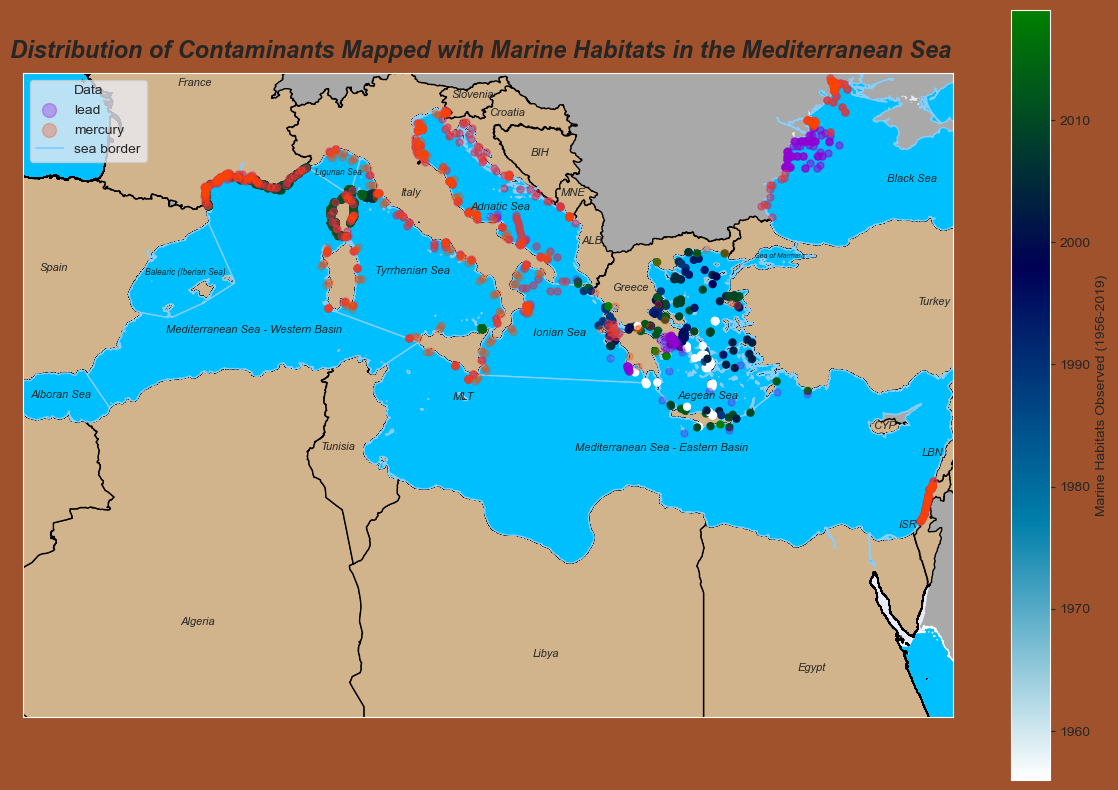

In [49]:
sea_data()

##### Insight:
It appears that there are traces of lead and mercury detected in marine habitats along the coast of France. Specifically, these marine habitats were observed in the last decade (i.e., 2010+). Given that the data on contaminants was collected between 2015 and 2021, and considering that these marine habitats were recently researched, it suggests that marine biologists are aware of the concentration of contaminants and were inclined to observe the state of the marine habitats along the coast of France.

In the Adriatic Sea, there is a mixture of lead and mercury present. Also, The Aegean Sea seems to have a high density of marine habitats that were observed throughout the timeframe from 1956 to 2019. This could indicate that the Aegean Sea has a significant number of marine habitats compared to other seas in the Mediterranean Sea. Although, it's also possible that the Aegean Sea was a primary area of focus for the scientists who collected the data. 

Ultimately, It seems that that the majority of these heavy metals happen to appear on the coast of european countries that border the Mediterranean Sea.

##### Looking at the Aegean Sea

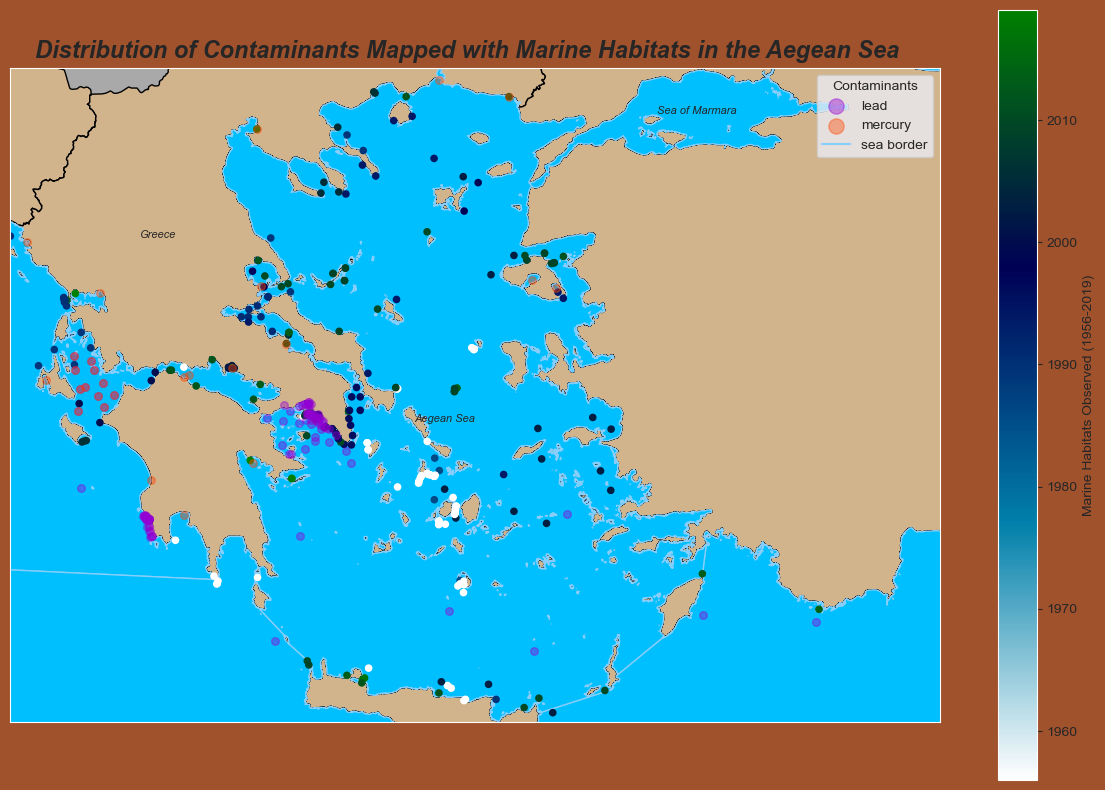

In [50]:
sea_data(sea_name='Aegean Sea',conts=True,ma=True)

##### Quick Insight: 
It seems that the port of Athens has a dense concentration of lead, that is, naturally. However, the majority is free of contaminants, which is surprising knowing its history. Also, most marine habitats were observed in 90's and below.

### Mapping the Mediterranean Sea by the Percent of Contaminants

In [51]:
def percent_conts(sea_name):
    """
    string -> dict
    
    expects a sub sea in the mediterranean sea
    returns the percent of all contaminants,
    percent of lead, and percent of mercury found in the given sea, respectively.
    
    """
    #find the sea in the `medi_body` dataframe
    sea_data = medi_body.loc[medi_body['name'] == sea_name]
    
    #obtain the min and max for both x and y of the sea
    
    sea_xmin = float(sea_data.min_x)
    sea_xmax = float(sea_data.max_x)
    sea_ymin = float(sea_data.min_y)
    sea_ymax = float(sea_data.max_y)
    
    #filter the dataframes of the contaminants on to the points that fall into the given sea
    
    lead_vals = medi_lead_filtered.loc[#finds the min and max of x at correspond to the sea
                        ((medi_lead_filtered.Longitude >= sea_xmin) 
                          & 
                         (medi_lead_filtered.Longitude <= sea_xmax))
    
                        & #finds the min and max of y that correspond to the sea
                        ((medi_lead_filtered.Latitude >= sea_ymin) 
                          & 
                         (medi_lead_filtered.Latitude <= sea_ymax))]

    merc_vals = medi_mercury_filtered.loc[#finds the min and max of x at correspond to the sea
                        ((medi_mercury_filtered.Longitude >= sea_xmin) 
                          & 
                         (medi_mercury_filtered.Longitude <= sea_xmax))
    
                        & #finds the min and max of y that correspond to the sea
                        ((medi_mercury_filtered.Latitude >= sea_ymin) 
                          & 
                         (medi_mercury_filtered.Latitude <= sea_ymax))]
    
    #spatial join to manipulate a dataframe that has the points that fall in the sea
    #get the point that fall in the sea
    merc_points = gpd.sjoin(sea_data,merc_vals,how='right')
    lead_points = gpd.sjoin(sea_data,lead_vals,how='right')
    #gets rid of the points that where surrounding the sea due to how the points were filtered/joined
    lead_points.dropna(inplace=True)
    merc_points.dropna(inplace=True)
    
    #deifne their count to calcute the percentage of contaminants that fell in that sea
    num_merc_sea = len(merc_points)
    num_lead_sea = len(lead_points)
    total_conts = num_merc_sea+num_lead_sea
    total_merc = len(medi_mercury_filtered)
    total_lead = len(medi_lead_filtered)
    total_medi_conts = total_merc + total_lead
    
    #percent of each contaminant that made up in that sea
    percent_merc = round((num_merc_sea/total_merc)* 100,2)
    percent_lead = round((num_lead_sea/total_lead)* 100,2)
    #percent of all contaminant for the sea
    percent_conts = round((total_conts/total_medi_conts)* 100,2)
    
    percent_all = {'contaminant_measured':percent_conts,
                   'lead_measured':percent_lead,
                   'mercury_measured':percent_merc}
    return percent_all
    


In [52]:
percent_conts('Tyrrhenian Sea')#example output

{'contaminant_measured': 8.68,
 'lead_measured': 5.63,
 'mercury_measured': 12.05}

In [53]:
# adding three new columns to `medi_body` using `percent_conts` 

medi_body['contaminant_measured'] = [percent_conts(sea)['contaminant_measured'] for sea in sub_seas]
medi_body['lead_measured'] = [percent_conts(sea)['lead_measured'] for sea in sub_seas]
medi_body['mercury_measured'] = [percent_conts(sea)['mercury_measured'] for sea in sub_seas]
#note: the sum of the percents did not add up to 100


In [54]:
def conts_plot(lead=False,mercury=False):
    """
    lead = boolean, mercury = boolean -> plot
    By default, returns a density map of all contaminants.
    If any of the optional arguments, which correspond to a contaminant, are set to true,
    it will return a density map for that specific contaminant.
    
    """
    
    if lead:
        fig, ax = plt.subplots(figsize=(15, 10))

        world_bound.plot(ax=ax, color='darkgrey', edgecolor='darkgrey')
        red_sea.plot(ax=ax, color='deepskyblue',edgecolor='deepskyblue')
        nao.plot(ax=ax, color='deepskyblue')

        [land_bounds[i].plot(ax=ax, color='navajowhite', edgecolor='k') for i in np.arange(num_land_bounds)]  # plots each country that shares the border with the Mediterranean

        # code for adding labels for the countries
        # the conditionals will place country's labels at or near their center (centroid)

        [plt.annotate(land_bounds[i]['NAME_ENGLI'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
              xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
              ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Slovenia'].NAME_ENGLI  # fit the label for Slovenia
         else plt.annotate(land_bounds[i]['NAME_ENGLI'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y + 0.5),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Croatia'].NAME_ENGLI  # fit the label for Croatia
         else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Montenegro'].NAME_ENGLI  # fit the label for Montenegro
         else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Albania'].NAME_ENGLI  # fit the label for Albania
         else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Bosnia'].NAME_ENGLI  # fit the label for Bosnia and Herzegovina
         else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x - 1, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Israel'].NAME_ENGLI  # fit the label for Israel
         else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x - 0.8, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Lebanon'].NAME_ENGLI  # fit the label for Lebanon
         else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y - 0.1),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].SQKM[0] <= 9226.847  # to fit the label for Cyprus and Malta
         else plt.annotate(land_bounds[i]['NAME_ENGLI'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x - 0.7, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Tunisia'].NAME_ENGLI  # fit the label for Tunisia
         else plt.annotate(land_bounds[i]['NAME_ENGLI'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x - 1.2, land_bounds[i].geometry.centroid.y + 0.5),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Greece'].NAME_ENGLI  # fit the label for Greece
         else plt.annotate(land_bounds[i]['NAME_ENGLI'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
           ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)  # to fit the label for bigger countries
             for i in np.arange(num_land_bounds)]

        # geo data plotting
        medi_body.plot(cmap='cividis_r', column='lead_measured', edgecolor='goldenrod',legend=True,
               legend_kwds={'label': 'Lead Percent'},
               markersize=20,ax=ax)

        # code to add labels to all the sub-seas
        #conditionals will adjust the label for certain sub seas
        [ plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
              ha='center', color= 'k',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Sea of Azov'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
              ha='center', color= 'k',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Alboran Sea'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]-0.4),
              ha='center', color= '#F5F5F5',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Adriatic Sea'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]-2),
              ha='center', color= 'white',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Aegean Sea'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
              ha='center', color= 'k',fontsize=5, fontstyle='italic')
                if sub_seas[i] == 'Sea of Marmara'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
              ha='center', color= 'k',fontsize=5, fontstyle='italic')
                if sub_seas[i] == 'Ligurian Sea'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]-1.2),
              ha='center', color= '#F5F5F5',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Mediterranean Sea - Western Basin'
         else  plt.annotate(sub_seas[i], (medi_body.longitude[i]+0.2, medi_body.latitude[i]),
              ha='center', color= 'k',fontsize=6, fontstyle='italic')
                if sub_seas[i] == 'Balearic (Iberian Sea)'
         else
        plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
              ha='center', color= '#F5F5F5',fontsize=8, fontstyle='italic')
         for i in np.arange(num_seas)]

        # zooms onto the Mediterranean Sea
        plt.axis([-5, 36, 25, 47])

        # add interpretability to the map
        # create an empty plot that allows adding a label for the border that separates the seas
        plt.plot([], [], color='goldenrod', label='sea border')
        plt.legend(title='Data', markerscale=2,loc='upper left')
        # remove the ticks on both axes
        plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
                
                
        plt.suptitle('Density of Lead in the Mediterranean Sea (2015-2021)',
                     fontweight='bold',
                     fontstyle='oblique',fontsize=17,y=0.85,x=0.43)
        fig.set_facecolor('sienna')
        
        plt.show()
    elif mercury:
        
        fig, ax = plt.subplots(figsize=(15, 10))

        world_bound.plot(ax=ax, color='darkgrey', edgecolor='darkgrey')
        red_sea.plot(ax=ax, color='deepskyblue',edgecolor='deepskyblue')
        nao.plot(ax=ax, color='deepskyblue')

        [land_bounds[i].plot(ax=ax, color='navajowhite', edgecolor='k') for i in np.arange(num_land_bounds)]  # plots each country that shares the border with the Mediterranean

        # code for adding labels for the countries
        # the conditionals will place country's labels at or near their center (centroid)

        [plt.annotate(land_bounds[i]['NAME_ENGLI'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
              xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
              ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
            if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Slovenia'].NAME_ENGLI  # fit the label for Slovenia
            else plt.annotate(land_bounds[i]['NAME_ENGLI'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y + 0.5),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
            if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Croatia'].NAME_ENGLI  # fit the label for Croatia
            else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
            if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Montenegro'].NAME_ENGLI  # fit the label for Montenegro
            else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
            if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Albania'].NAME_ENGLI  # fit the label for Albania
            else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
            if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Bosnia'].NAME_ENGLI  # fit the label for Bosnia and Herzegovina
            else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x - 1, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
            if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Israel'].NAME_ENGLI  # fit the label for Israel
            else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x - 0.8, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
            if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Lebanon'].NAME_ENGLI  # fit the label for Lebanon
            else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y - 0.1),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
            if land_bounds[i].SQKM[0] <= 9226.847  # to fit the label for Cyprus and Malta
            else plt.annotate(land_bounds[i]['NAME_ENGLI'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x - 0.7, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
            if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Tunisia'].NAME_ENGLI  # fit the label for Tunisia
            else plt.annotate(land_bounds[i]['NAME_ENGLI'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x - 1.2, land_bounds[i].geometry.centroid.y + 0.5),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
            if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Greece'].NAME_ENGLI  # fit the label for Greece
            else plt.annotate(land_bounds[i]['NAME_ENGLI'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
               ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)  # to fit the label for bigger countries
             for i in np.arange(num_land_bounds)]

        # geo data plotting
        medi_body.plot(cmap='cividis_r', column='mercury_measured', edgecolor='goldenrod',legend=True,
               legend_kwds={'label': 'Mercury Percent)'},
               markersize=20,ax=ax)

        # code to add labels to all the sub-seas
        #conditionals will adjust the label for certain sub seas
        [ plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
              ha='center', color= 'k',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Sea of Azov'
             else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
              ha='center', color= 'k',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Alboran Sea'
             else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]-0.4),
              ha='center', color= '#F5F5F5',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Adriatic Sea'
             else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]-2),
              ha='center', color= 'white',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Aegean Sea'
             else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
              ha='center', color= 'k',fontsize=5, fontstyle='italic')
                if sub_seas[i] == 'Sea of Marmara'
             else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
              ha='center', color= 'k',fontsize=5, fontstyle='italic')
                if sub_seas[i] == 'Ligurian Sea'
             else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]-1.2),
             ha='center', color= '#F5F5F5',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Mediterranean Sea - Western Basin'
             else  plt.annotate(sub_seas[i], (medi_body.longitude[i]+0.2, medi_body.latitude[i]),
              ha='center', color= 'k',fontsize=6, fontstyle='italic')
                if sub_seas[i] == 'Balearic (Iberian Sea)'
             else
                plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
                  ha='center', color= '#F5F5F5',fontsize=8, fontstyle='italic')
                 for i in np.arange(num_seas)]

        # zooms onto the Mediterranean Sea
        plt.axis([-5, 36, 25, 47])
    
        # add interpretability to the map
        # create an empty plot that allows adding a label for the border that separates the seas
        plt.plot([], [], color='goldenrod', label='sea border')
        plt.legend(title='Data', markerscale=2,loc='upper left')
        # remove the ticks on both axes
        plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
                
                
        plt.suptitle('Density of Mercury in the Mediterranean Sea (2015-2021)',
                     fontweight='bold',
                     fontstyle='oblique',fontsize=17,y=0.85,x=0.43)
        fig.set_facecolor('sienna')
        
        plt.show()
    else:
        fig, ax = plt.subplots(figsize=(15, 10))

        world_bound.plot(ax=ax, color='darkgrey', edgecolor='darkgrey')
        red_sea.plot(ax=ax, color='deepskyblue',edgecolor='deepskyblue')
        nao.plot(ax=ax, color='deepskyblue')

        [land_bounds[i].plot(ax=ax, color='navajowhite', edgecolor='k') for i in np.arange(num_land_bounds)]  # plots each country that shares the border with the Mediterranean

        # code for adding labels for the countries
        # the conditionals will place country's labels at or near their center (centroid)

        [plt.annotate(land_bounds[i]['NAME_ENGLI'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
              xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
              ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Slovenia'].NAME_ENGLI  # fit the label for Slovenia
         else plt.annotate(land_bounds[i]['NAME_ENGLI'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y + 0.5),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Croatia'].NAME_ENGLI  # fit the label for Croatia
         else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Montenegro'].NAME_ENGLI  # fit the label for Montenegro
         else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Albania'].NAME_ENGLI  # fit the label for Albania
         else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Bosnia'].NAME_ENGLI  # fit the label for Bosnia and Herzegovina
         else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x - 1, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Israel'].NAME_ENGLI  # fit the label for Israel
         else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x - 0.8, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Lebanon'].NAME_ENGLI  # fit the label for Lebanon
         else plt.annotate(land_bounds[i]['ISO'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y - 0.1),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].SQKM[0] <= 9226.847  # to fit the label for Cyprus and Malta
         else plt.annotate(land_bounds[i]['NAME_ENGLI'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x - 0.7, land_bounds[i].geometry.centroid.y),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Tunisia'].NAME_ENGLI  # fit the label for Tunisia
         else plt.annotate(land_bounds[i]['NAME_ENGLI'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
                   xytext=(land_bounds[i].geometry.centroid.x - 1.2, land_bounds[i].geometry.centroid.y + 0.5),
                   ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)
         if land_bounds[i].NAME_ENGLI[0] == land_bounds_df.loc['Greece'].NAME_ENGLI  # fit the label for Greece
         else plt.annotate(land_bounds[i]['NAME_ENGLI'][0], (land_bounds[i].geometry.centroid.x, land_bounds[i].geometry.centroid.y),
           ha='center', fontsize=8, fontstyle='italic', annotation_clip=True)  # to fit the label for bigger countries
             for i in np.arange(num_land_bounds)]

        # geo data plotting
        medi_body.plot(cmap='cividis_r', column='contaminant_measured', edgecolor='goldenrod',legend=True,
               legend_kwds={'label': 'Contaminant Percent '},
               markersize=20,ax=ax)

        # code to add labels to all the sub-seas
        #conditionals will adjust the label for certain sub seas
        [ plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
              ha='center', color= 'k',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Sea of Azov'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
              ha='center', color= 'k',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Alboran Sea'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]-0.4),
              ha='center', color= '#F5F5F5',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Adriatic Sea'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]-2),
              ha='center', color= 'white',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Aegean Sea'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
              ha='center', color= 'k',fontsize=5, fontstyle='italic')
                if sub_seas[i] == 'Sea of Marmara'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
              ha='center', color= 'k',fontsize=5, fontstyle='italic')
                if sub_seas[i] == 'Ligurian Sea'
         else plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]-1.2),
              ha='center', color= '#F5F5F5',fontsize=8, fontstyle='italic')
                if sub_seas[i] == 'Mediterranean Sea - Western Basin'
         else  plt.annotate(sub_seas[i], (medi_body.longitude[i]+0.2, medi_body.latitude[i]),
              ha='center', color= 'k',fontsize=6, fontstyle='italic')
                if sub_seas[i] == 'Balearic (Iberian Sea)'
         else
        plt.annotate(sub_seas[i], (medi_body.longitude[i], medi_body.latitude[i]),
              ha='center', color= '#F5F5F5',fontsize=8, fontstyle='italic')
         for i in np.arange(num_seas)]

        # zooms onto the Mediterranean Sea
        plt.axis([-5, 36, 25, 47])

        # add interpretability to the map
        # create an empty plot that allows adding a label for the border that separates the seas
        plt.plot([], [], color='goldenrod', label='sea border')
        plt.legend(title='Data', markerscale=2,loc='upper left')
        # remove the ticks on both axes
        plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
                
                
        plt.suptitle('Density of Contaminants in the Mediterranean Sea (2015-2021)',
                     fontweight='bold',
                     fontstyle='oblique',fontsize=17,y=0.85,x=0.43)
        fig.set_facecolor('sienna')
        
        plt.show()




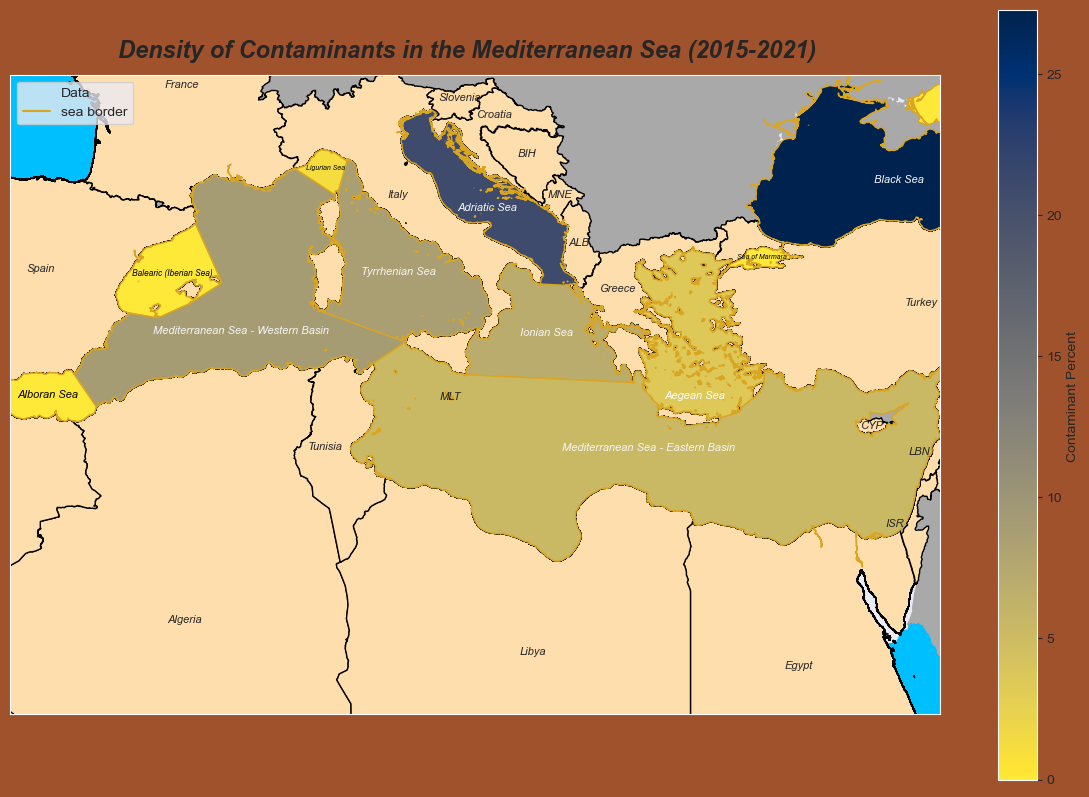

In [55]:
conts_plot()

##### Insight:
It appears that some seas have not yet been sampled for contaminants(bright yellow). Additionally, the Black Sea shows high levels of contaminants, with the Adriatic Sea following closely behind. The countries bordering these bodies of water have large populations, although this could be influenced by tourism. Geotagging refers to the concept of tagging a natural location on social media, which can attract visitors and potentially impact the environment. Could this phenomenon be related to the findings?


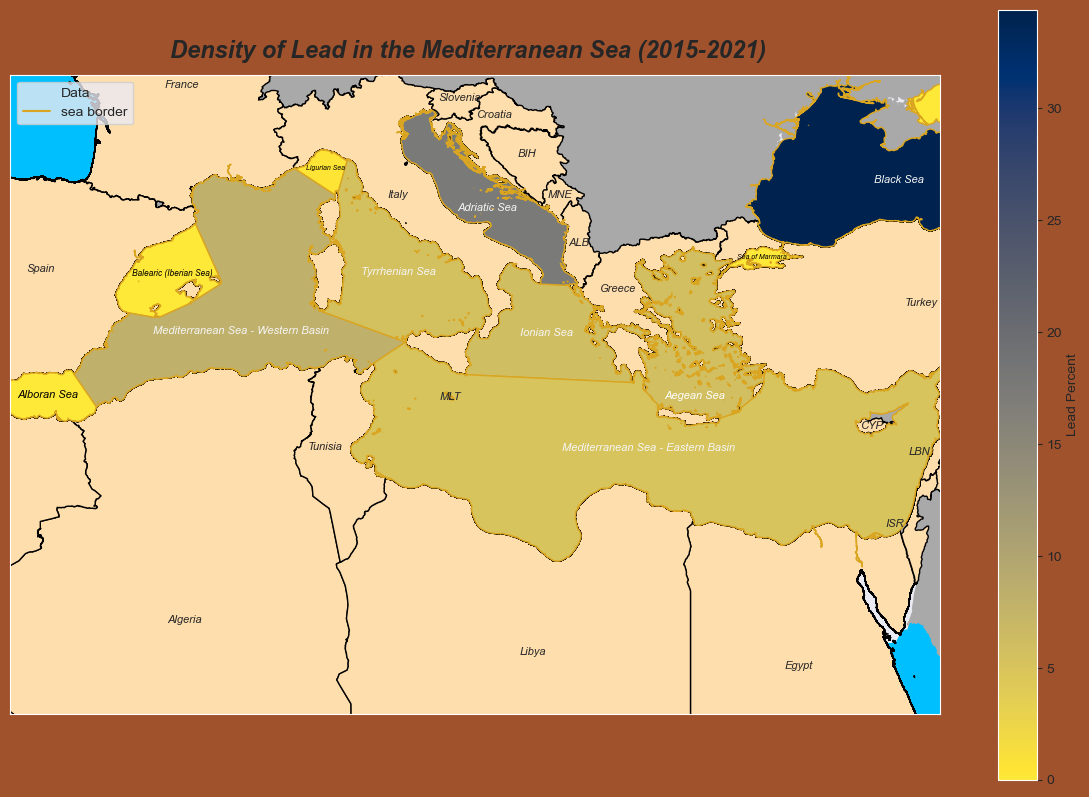

In [56]:
conts_plot(lead=True)

##### Quick Insight:
The Black Sea seems to contains at most 30% of lead.

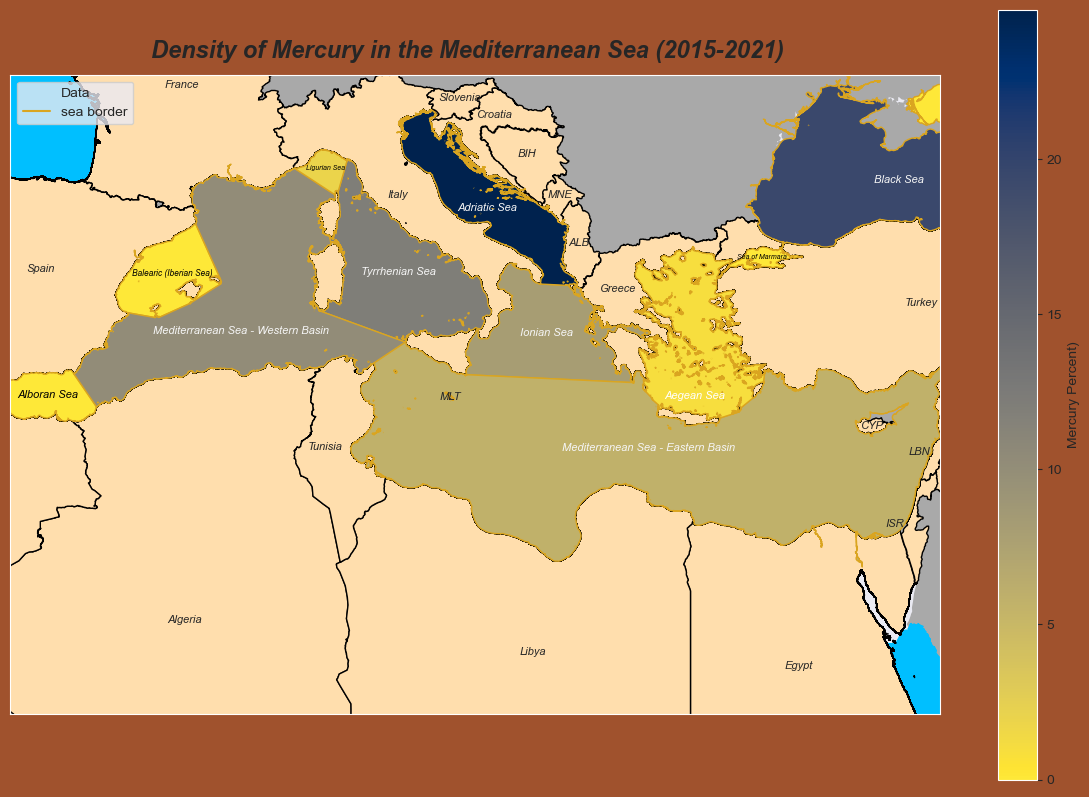

In [57]:
conts_plot(mercury=True)

##### Quick Insight:
The seas that neighbor Italy seem to have a significant amount of mercury, particularly the Adriatic Sea. Does Italy contribute to the levels of mercury found in its adjacent seas?

# Personal Reflection

- I improved my data processing skills by:
  - Utilizing regex to manipulate string values in a dataframe.
  - Knowing the data and identifying what is relevant for an insightful analysis.

- Worked on my geoprocessing skills by:
  - Locating the area of interest using the latitude and longitude.
  - Adding labels to relevant countries for better visualization.
  - Understanding that the order of layers of data that go on the map matters when it comes to making the map.

- Grasped the logistics of Geographic analysis by:
  - Comprehending the meaning of the order of map attributes when it comes to putting plots on the same axes.
  - Utilizing spatial joins to combine shapes, specifically points and polygons.

- I gained a better understanding of how to access rows when indexed with a string.  

- I improved my skills to program functions that output plots, particularly subplots, and by tailoring the number of subplots through the length of the given list.
- Improved my interpretation of data visualizations by:
  - Asking questions relevant to the content of the visual.
  - Understanding that every data visualization has its insight.